# Covid-19 Predictive Model

_Author: Mill C.T. Liao (SYD)_

_Linkedin: https://www.linkedin.com/in/mill-liao-70b387116/_

_Email: mill.ct.liao@gmail.com_

---

## Data resource: Our World in Data

Coronavirus (COVID-19) Cases: https://ourworldindata.org/covid-cases by Max Roser, Hannah Ritchie, Esteban Ortiz-Ospina and Joe Hasell

Coronavirus (COVID-19) Deaths: https://ourworldindata.org/covid-deaths by Max Roser, Hannah Ritchie, Esteban Ortiz-Ospina and Joe Hasell

Coronavirus (COVID-19) Testing: https://ourworldindata.org/coronavirus-testing by Joe Hasell, Edouard Mathieu, Diana Beltekian, Bobbie Macdonald, Charlie Giattino, Esteban Ortiz-Ospina, Hannah Ritchie and Max Roser

Policy Responses to the Coronavirus Pandemic: https://ourworldindata.org/policy-responses-covid by Hannah Ritchie, Max Roser, Esteban Ortiz-Ospina and Joe Hasell

---

In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gp
import datetime

In [2]:
from matplotlib import pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.api import VAR

from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.ar_model import ar_select_order
from sklearn.metrics import mean_absolute_error

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [14]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - Trying to download new driver from http://chromedriver.storage.googleapis.com/83.0.4103.39/chromedriver_mac64.zip
[WDM] - Unpack archive /Users/john_stuart_mill/.wdm/drivers/chromedriver/83.0.4103.39/mac64/chromedriver.zip


## Total and daily confirmed cases 

In [4]:
# Web page for total and confirmed cases
driver.get('https://ourworldindata.org/covid-cases')

In [6]:
# Total cases
driver.find_element_by_xpath('/html/body/main/article/div[3]/div[2]/div/div/section[3]/div[2]/div[1]/figure/div/div[4]/div/a').click()

In [8]:
# Daily cases
driver.find_element_by_xpath('/html/body/main/article/div[3]/div[2]/div/div/section[3]/div[4]/div[1]/figure/div/div[4]/div/a').click()

## Total and daily deaths

In [10]:
# Web page for deaths toll
driver.get('https://ourworldindata.org/covid-deaths')

In [16]:
# Total deaths
driver.find_element_by_xpath('/html/body/main/article/div[3]/div[2]/div/div/section[3]/div[2]/div[1]/figure/div/div[4]/div/a').click()

In [17]:
# Daily deaths
driver.find_element_by_xpath('/html/body/main/article/div[3]/div[2]/div/div/section[3]/div[4]/div[1]/figure/div/div[4]/div/a').click()

## Total and daily tests

In [19]:
driver.get('https://ourworldindata.org/grapher/full-list-covid-19-tests-per-day')

In [20]:
# Daily tests
driver.find_element_by_xpath('/html/body/main/figure/div/div[4]/div/a').click()

In [21]:
driver.get('https://ourworldindata.org/grapher/full-list-total-tests-for-covid-19?time=..')

In [22]:
# Total tests
driver.find_element_by_xpath('/html/body/main/figure/div/div[4]/div/a').click()

## Government responses

In [24]:
driver.get('https://ourworldindata.org/policy-responses-covid')

#### School and workplace closeures

In [25]:
# School closures
driver.find_element_by_xpath('/html/body/main/article/div[3]/div[2]/div/div/section[2]/div[2]/div[1]/figure/div/div[4]/div/a').click()

In [27]:
# Workplace closures
driver.find_element_by_xpath('/html/body/main/article/div[3]/div[2]/div/div/section[2]/div[3]/div[1]/figure/div/div[4]/div/a').click()

#### Cancellation of public events and gatherings

In [29]:
# Cancellation of public events
driver.find_element_by_xpath('/html/body/main/article/div[3]/div[2]/div/div/section[3]/div[2]/div[1]/figure/div/div[4]/div/a').click()

In [30]:
# Restrictions on public gatherings
driver.find_element_by_xpath('/html/body/main/article/div[3]/div[2]/div/div/section[3]/div[3]/div[1]/figure/div/div[4]/div/a').click()

#### Public information campaigns

In [32]:
driver.find_element_by_xpath('/html/body/main/article/div[3]/div[2]/div/div/section[4]/div[2]/div[1]/figure/div/div[4]/div/a').click()

#### Stay-at-home restrictions

In [34]:
driver.find_element_by_xpath('/html/body/main/article/div[3]/div[2]/div/div/section[5]/div[2]/div[1]/figure/div/div[4]/div/a').click()

#### International and domestic travel

In [36]:
# Public transport
driver.find_element_by_xpath('/html/body/main/article/div[3]/div[2]/div/div/section[6]/div[2]/div[1]/figure/div/div[4]/div/a').click()

In [37]:
# Restrictions on internal movement
driver.find_element_by_xpath('/html/body/main/article/div[3]/div[2]/div/div/section[6]/div[3]/div[1]/figure/div/div[4]/div/a').click()

In [38]:
# International travel controls
driver.find_element_by_xpath('/html/body/main/article/div[3]/div[2]/div/div/section[6]/div[4]/div[1]/figure/div/div[4]/div/a').click()

#### Testing and contact tracing

In [40]:
# Testing policy
driver.find_element_by_xpath('/html/body/main/article/div[3]/div[2]/div/div/section[7]/div[2]/div[1]/figure/div/div[4]/div/a').click()

In [41]:
# Contact tracing
driver.find_element_by_xpath('/html/body/main/article/div[3]/div[2]/div/div/section[7]/div[3]/div[1]/figure/div/div[4]/div/a').click()

#### Government Stringency Index

In [43]:
driver.find_element_by_xpath('/html/body/main/article/div[3]/div[2]/div/div/section[8]/div[2]/div[1]/figure/div/div[4]/div/a').click()

#### Load all dataframe

In [4]:
total_cases = pd.read_csv('/Users/john_stuart_mill/Downloads/total-cases-covid-19.csv')
daily_cases = pd.read_csv('/Users/john_stuart_mill/Downloads/daily-cases-covid-19.csv')
total_deaths = pd.read_csv('/Users/john_stuart_mill/Downloads/total-deaths-covid-19.csv')
daily_deaths = pd.read_csv('/Users/john_stuart_mill/Downloads/daily-deaths-covid-19.csv')

In [5]:
total_tests = pd.read_csv('/Users/john_stuart_mill/Downloads/full-list-total-tests-for-covid-19.csv')
daily_tests = pd.read_csv('/Users/john_stuart_mill/Downloads/full-list-covid-19-tests-per-day.csv')

In [6]:
school_closures = pd.read_csv('/Users/john_stuart_mill/Downloads/school-closures-covid.csv')
workplace_closures = pd.read_csv('/Users/john_stuart_mill/Downloads/workplace-closures-covid.csv')
cancellation_of_public_events = pd.read_csv('/Users/john_stuart_mill/Downloads/public-events-covid.csv')
restrictions_on_public_gatherings = pd.read_csv('/Users/john_stuart_mill/Downloads/public-gathering-rules-covid.csv')
public_information_campaigns = pd.read_csv('/Users/john_stuart_mill/Downloads/public-campaigns-covid.csv')
stay_at_home = pd.read_csv('/Users/john_stuart_mill/Downloads/stay-at-home-covid.csv')
restrictions_on_public_transport = pd.read_csv('/Users/john_stuart_mill/Downloads/public-transport-covid.csv')
restrictions_on_internal_movement = pd.read_csv('/Users/john_stuart_mill/Downloads/internal-movement-covid.csv')
international_travel_controls = pd.read_csv('/Users/john_stuart_mill/Downloads/international-travel-covid.csv')
testing_policy = pd.read_csv('/Users/john_stuart_mill/Downloads/covid-19-testing-policy.csv')
contact_tracing = pd.read_csv('/Users/john_stuart_mill/Downloads/covid-contact-tracing.csv')
government_stringency_index = pd.read_csv('/Users/john_stuart_mill/Downloads/covid-stringency-index.csv')

## Data Cleaning Phase 1

### Functions define

In [7]:
# Set time series data
def time_series_type(data):
    data['datetime'] = pd.to_datetime(data['Date'])
    return data

In [8]:
# Drop 'date' data
def drop_data(data):
    data.drop(['Date','Code'],axis=1,inplace=True)
    return data

In [9]:
# Drop non-country data 
def delete_non_countries(data):
    data.drop(data[(data['Entity'] == 'Africa')
                   |(data['Entity'] == 'Asia')
                   |(data['Entity'] == 'Asia excl. China')
                   |(data['Entity'] == 'Europe')
                   |(data['Entity'] == 'European Union')
                   |(data['Entity'] == 'High income')
                   |(data['Entity'] == 'International')
                   |(data['Entity'] == 'Low income')
                   |(data['Entity'] == 'Lower middle income')
                   |(data['Entity'] == 'North America')
                   |(data['Entity'] == 'Oceania')
                   |(data['Entity'] == 'South Africa')
                   |(data['Entity'] == 'South America')
                   |(data['Entity'] == 'Upper middle income')
                   |(data['Entity'] == 'Western Sahara')
                   |(data['Entity'] == 'World')
                   |(data['Entity'] == 'World excl. China')
                   |(data['Entity'] == 'World excl. China and South Korea')
                   |(data['Entity'] == 'World excl. China, South Korea, Japan and Singapore')].index,inplace=True)
    return data

In [10]:
# Drop non-country data 
def delete_non_countries_tests(data):
    data.drop(data[(data['Entity'] == 'Africa')
                   |(data['Entity'] == 'Asia')
                   |(data['Entity'] == 'Asia excl. China')
                   |(data['Entity'] == 'Europe')
                   |(data['Entity'] == 'European Union')
                   |(data['Entity'] == 'High income')
                   |(data['Entity'] == 'International')
                   |(data['Entity'] == 'Low income')
                   |(data['Entity'] == 'Lower middle income')
                   |(data['Entity'] == 'North America')
                   |(data['Entity'] == 'Oceania')
                   |(data['Entity'] == 'South Africa')
                   |(data['Entity'] == 'South America')
                   |(data['Entity'] == 'Upper middle income')
                   |(data['Entity'] == 'Western Sahara')
                   |(data['Entity'] == 'World')
                   |(data['Entity'] == 'World excl. China')
                   |(data['Entity'] == 'World excl. China and South Korea')
                   |(data['Entity'] == 'World excl. China, South Korea, Japan and Singapore')
                   |(data['Entity'] == 'Ghana, samples tested')
                   |(data['Entity'] == 'India, people tested')
                   |(data['Entity'] == 'Italy, people tested')
                   |(data['Entity'] == 'United Kingdom, tests performed')
                   |(data['Entity'] == 'United States, tests performed')
                   |(data['Entity'] == 'United States, tests performed')
                   |(data['Entity'] == 'Hong Kong')
                  ].index,inplace=True)
    return data

In [11]:
def data_cleaning(data):  
    time_series_type(data)
    drop_data(data)
    delete_non_countries(data)
    
    return data

In [12]:
def data_cleaning_tests(data):  
    time_series_type(data)
    drop_data(data)
    delete_non_countries_tests(data)
    
    return data

### Predictor variable

#### 14 Features

- (1) Total Tests


- (2) Daily Tests


- (3) School Closures:

   - No data
   
   - No measures
   
   - Recommended
   
   - Required (only at some levels)
   
   - Required (all levels)
   

- (4) Workplace Closures:

   - No data
   
   - No measures
   
   - Recommended
   
   - Required for some
   
   - Required for all but key workers
   

- (5) cancellation_of_public_events:

   - No data
   
   - No measures

   - Recommended cancellations

   - Required cancellations
   

- (6) Restrictions on Public Gatherings:

   - Restrictions are given based on the size of public gatherings as follows:
   
   - 1 - Restrictions on very large gatherings (the limit is above 1000 people)
   
   - 2 - gatherings between 100-1000 people
   
   - 3 - gatherings between 10-100 people
   
   - 4 - gatherings of less than 10 people
   

- (7) Public Information Campaigns:

   - No data
   
   - None
   
   - Public officials urging caution
   
   - Coordinated information campaign
   

- (8) Stay at Home

  - No data
  
  - No measures

  - Recommended

  - Required (except essentials)

  - Required (few exceptions)
  

- (9) Restrictions on Public Transport:

  - No data
  
  - No measures
  
  - Recommended closing (or reduce volume)
  
  - Required closing (or prohibit most using it)
  

- (10) Restrictions on Internal Movement:

  - No data
  
  - No measures
  
  - Recommend movement restriction
  
  - Restrict movement
  

- (11) International Travel Controls:

  - No Data

  - No measures
  
  - Screening
  
  - Quarantine from high-risk regions

  - Total border closure
  

- (12) Testing Policy: COVID-19 testing policies are categorized as follows:
   
   - No testing policy.

   - Only those who both (a) have symptoms and also (b) meet specific criteria (eg
     key workers, admitted to hospital, came into contact with a known case,
     returned from overseas).

   - Testing of anyone showing COVID-19 symptoms.

   - Open public testing (e.g “drive through” testing available to asymptomatic people).
     

- (13) Contact Tracing: 

   - 'Limited' contact tracing means some, but not all, cases are traced. 
   
   - 'Comprehensive' tracing means all cases are traced.
     

- (14) Government Stringency Index: 

   - The Government Response Stringency Index is a composite measure based on nine
     response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 
     0 to 100 (100 = strictest response).

In [13]:
# 1
total_tests = data_cleaning_tests(total_tests)
# 2
daily_tests = data_cleaning_tests(daily_tests)
# 3
school_closures = data_cleaning(school_closures)
# 4
workplace_closures = data_cleaning(workplace_closures)
# 5
cancellation_of_public_events = data_cleaning(cancellation_of_public_events)
# 6
restrictions_on_public_gatherings = data_cleaning(restrictions_on_public_gatherings)
# 7
public_information_campaigns = data_cleaning(public_information_campaigns)
# 8
stay_at_home = data_cleaning(stay_at_home)
# 9
restrictions_on_public_transport = data_cleaning(restrictions_on_public_transport)
# 10
restrictions_on_internal_movement = data_cleaning(restrictions_on_internal_movement)
# 11
international_travel_controls = data_cleaning(international_travel_controls)
# 12
testing_policy = data_cleaning(testing_policy)
# 13
contact_tracing = data_cleaning(contact_tracing)
# 14
government_stringency_index = data_cleaning(government_stringency_index)

### Target variable

- (1) Daily Cases


- (2) Daily Deaths


- (3) Total Cases


- (4) Total Deaths

In [14]:
# 1
daily_cases = data_cleaning(daily_cases)
# 2
daily_deaths = data_cleaning(daily_deaths)
# 3
total_cases = data_cleaning(total_cases)
# 4
total_deaths = data_cleaning(total_deaths)

## Data Cleaning Phase 2

### Cases and Deaths

In [15]:
def transform_dataframe(dataframe):
    return dataframe.groupby(['datetime','Entity']).mean().unstack()

In [16]:
daily_cases = transform_dataframe(daily_cases)
daily_deaths = transform_dataframe(daily_deaths)
total_cases = transform_dataframe(total_cases)
total_deaths = transform_dataframe(total_deaths)

In [17]:
print('The shape of daily_cases: ',daily_cases.shape)
print('The shape of daily_deaths: ',daily_deaths.shape)
print('The shape of total_cases: ',total_cases.shape)
print('The shape of total_deaths: ',total_deaths.shape)

The shape of daily_cases:  (149, 207)
The shape of daily_deaths:  (149, 207)
The shape of total_cases:  (149, 207)
The shape of total_deaths:  (149, 207)


### Tests

In [18]:
def preprocessing_test(dataframe):
    nw = list(set(daily_cases.columns.get_level_values(1))-set(dataframe['Entity'].unique()))
    nw_df = pd.DataFrame({'Entity':nw,'datetime':pd.to_datetime('2019/12/31')})
    return pd.concat([dataframe,nw_df],axis=0)

In [19]:
daily_tests = preprocessing_test(daily_tests)
total_tests = preprocessing_test(total_tests)

In [20]:
daily_tests = transform_dataframe(daily_tests)
total_tests = transform_dataframe(total_tests)

In [21]:
daily_tests.drop(['Japan','Thailand'],axis=1,level=1,inplace=True)

In [22]:
daily_tests = daily_tests.rename(columns={'Thailand, people tested':'Thailand',
                                                'Japan, tests performed':'Japan',
                                                },level=1)

In [23]:
total_tests.drop(['Japan','Thailand','Singapore, swabs tested'],axis=1,level=1,inplace=True)

In [24]:
total_tests = total_tests.rename(columns={'Thailand, people tested':'Thailand',
                                                'Japan, tests performed':'Japan',
                                                },level=1)

In [25]:
print('The shape of daily_tests: ',daily_tests.shape)
print('The shape of total_tests: ',total_tests.shape)

The shape of daily_tests:  (149, 207)
The shape of total_tests:  (149, 207)


### Government response

In [26]:
school_closures = preprocessing_test(school_closures)
workplace_closures = preprocessing_test(workplace_closures)
cancellation_of_public_events = preprocessing_test(cancellation_of_public_events)
restrictions_on_public_gatherings = preprocessing_test(restrictions_on_public_gatherings)
public_information_campaigns = preprocessing_test(public_information_campaigns)
stay_at_home = preprocessing_test(stay_at_home)
restrictions_on_public_transport = preprocessing_test(restrictions_on_public_transport)
restrictions_on_internal_movement = preprocessing_test(restrictions_on_internal_movement)
international_travel_controls = preprocessing_test(international_travel_controls)
testing_policy = preprocessing_test(testing_policy)
contact_tracing = preprocessing_test(contact_tracing)
government_stringency_index = preprocessing_test(government_stringency_index)

In [27]:
school_closures = transform_dataframe(school_closures)
workplace_closures = transform_dataframe(workplace_closures)
cancellation_of_public_events = transform_dataframe(cancellation_of_public_events)
restrictions_on_public_gatherings = transform_dataframe(restrictions_on_public_gatherings)
public_information_campaigns = transform_dataframe(public_information_campaigns)
stay_at_home = transform_dataframe(stay_at_home)
restrictions_on_public_transport = transform_dataframe(restrictions_on_public_transport)
restrictions_on_internal_movement = transform_dataframe(restrictions_on_internal_movement)
international_travel_controls = transform_dataframe(international_travel_controls)
testing_policy = transform_dataframe(testing_policy)
contact_tracing = transform_dataframe(contact_tracing)
government_stringency_index = transform_dataframe(government_stringency_index)

In [28]:
print('The shape of school_closures: ',school_closures.shape)
print('The shape of workplace_closures: ',workplace_closures.shape)
print('The shape of cancellation_of_public_events: ',cancellation_of_public_events.shape)
print('The shape of restrictions_on_public_gatherings: ',restrictions_on_public_gatherings.shape)
print('The shape of public_information_campaigns: ',public_information_campaigns.shape)
print('The shape of stay_at_home: ',stay_at_home.shape)
print('The shape of restrictions_on_public_transport: ',restrictions_on_public_transport.shape)
print('The shape of restrictions_on_internal_movement: ',restrictions_on_internal_movement.shape)
print('The shape of international_travel_controls: ',international_travel_controls.shape)
print('The shape of testing_policy: ',testing_policy.shape)
print('The shape of contact_tracing: ',contact_tracing.shape)
print('The shape of government_stringency_index: ',government_stringency_index.shape)

The shape of school_closures:  (149, 211)
The shape of workplace_closures:  (149, 211)
The shape of cancellation_of_public_events:  (149, 211)
The shape of restrictions_on_public_gatherings:  (149, 211)
The shape of public_information_campaigns:  (149, 211)
The shape of stay_at_home:  (149, 211)
The shape of restrictions_on_public_transport:  (149, 211)
The shape of restrictions_on_internal_movement:  (149, 211)
The shape of international_travel_controls:  (149, 211)
The shape of testing_policy:  (149, 211)
The shape of contact_tracing:  (149, 211)
The shape of government_stringency_index:  (149, 211)


In [29]:
def check_countries(dataframe):
    return list(set(dataframe.columns.get_level_values(1))-set(daily_cases.columns.get_level_values(1)))

In [30]:
def drop_col_gv_rsp(dataframe):
    return dataframe.drop(['Macao',
                      'Hong Kong',
                      'Solomon Islands',
                      'Turkmenistan'],axis=1,level=1,inplace=True)

In [31]:
drop_col_gv_rsp(school_closures)
drop_col_gv_rsp(workplace_closures)
drop_col_gv_rsp(cancellation_of_public_events)
drop_col_gv_rsp(restrictions_on_public_gatherings)
drop_col_gv_rsp(public_information_campaigns)
drop_col_gv_rsp(stay_at_home)
drop_col_gv_rsp(restrictions_on_public_transport)
drop_col_gv_rsp(restrictions_on_internal_movement)
drop_col_gv_rsp(international_travel_controls)
drop_col_gv_rsp(testing_policy)
drop_col_gv_rsp(contact_tracing)
drop_col_gv_rsp(government_stringency_index)

In [32]:
print('The shape of school_closures: ',school_closures.shape)
print('The shape of workplace_closures: ',workplace_closures.shape)
print('The shape of cancellation_of_public_events: ',cancellation_of_public_events.shape)
print('The shape of restrictions_on_public_gatherings: ',restrictions_on_public_gatherings.shape)
print('The shape of public_information_campaigns: ',public_information_campaigns.shape)
print('The shape of stay_at_home: ',stay_at_home.shape)
print('The shape of restrictions_on_public_transport: ',restrictions_on_public_transport.shape)
print('The shape of restrictions_on_internal_movement: ',restrictions_on_internal_movement.shape)
print('The shape of international_travel_controls: ',international_travel_controls.shape)
print('The shape of testing_policy: ',testing_policy.shape)
print('The shape of contact_tracing: ',contact_tracing.shape)
print('The shape of government_stringency_index: ',government_stringency_index.shape)

The shape of school_closures:  (149, 207)
The shape of workplace_closures:  (149, 207)
The shape of cancellation_of_public_events:  (149, 207)
The shape of restrictions_on_public_gatherings:  (149, 207)
The shape of public_information_campaigns:  (149, 207)
The shape of stay_at_home:  (149, 207)
The shape of restrictions_on_public_transport:  (149, 207)
The shape of restrictions_on_internal_movement:  (149, 207)
The shape of international_travel_controls:  (149, 207)
The shape of testing_policy:  (149, 207)
The shape of contact_tracing:  (149, 207)
The shape of government_stringency_index:  (149, 207)


In [33]:
print(check_countries(school_closures))
print(check_countries(workplace_closures))
print(check_countries(cancellation_of_public_events))
print(check_countries(restrictions_on_public_gatherings))
print(check_countries(public_information_campaigns))
print(check_countries(stay_at_home))
print(check_countries(restrictions_on_public_transport))
print(check_countries(restrictions_on_internal_movement))
print(check_countries(international_travel_controls))
print(check_countries(testing_policy))
print(check_countries(contact_tracing))
print(check_countries(government_stringency_index))

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


## Fillna

In [92]:
school_closures.fillna(method='ffill',inplace=True)

In [90]:
school_closures.loc['2019-12-31',:] = school_closures.loc['2019-12-31',:].fillna(0)

In [93]:
school_closures

School closures                                          \
Entity         Afghanistan Albania Algeria Andorra Angola Anguilla   
datetime                                                             
2019-12-31             0.0     0.0     0.0     0.0    0.0      0.0   
2020-01-01             0.0     0.0     0.0     0.0    0.0      0.0   
2020-01-02             0.0     0.0     0.0     0.0    0.0      0.0   
2020-01-03             0.0     0.0     0.0     0.0    0.0      0.0   
2020-01-04             0.0     0.0     0.0     0.0    0.0      0.0   
...                    ...     ...     ...     ...    ...      ...   
2020-05-23             3.0     2.0     3.0     3.0    3.0      0.0   
2020-05-24             3.0     2.0     3.0     3.0    3.0      0.0   
2020-05-25             3.0     2.0     3.0     3.0    3.0      0.0   
2020-05-26             3.0     2.0     3.0     3.0    3.0      0.0   
2020-05-27             3.0     2.0     3.0     3.0    3.0      0.0   

                                                        ...                \
Entity     Antigua and Barbuda Argentina Armenia Aruba  ... United States   
datetime                                                ...                 
2019-12-31                 0.0       0.0     0.0   0.0  ...           0.0   
2020-01-01                 0.0       0.0     0.0   0.0  ...           0.0   
2020-01-02                 0.0       0.0     0.0   0.0  ...           0.0   
2020-01-03                 0.0       0.0     0.0   0.0  ...           0.0   
2020-01-04                 0.0       0.0     0.0   0.0  ...           0.0   
...                        ...       ...     ...   ...  ...           ...   
2020-05-23                 0.0       3.0     0.0   0.0  ...           3.0   
2020-05-24                 0.0       3.0     0.0   0.0  ...           3.0   
2020-05-25                 0.0       3.0     0.0   0.0  ...           3.0   
2020-05-26                 0.0       3.0     0.0   0.0  ...           3.0   
2020-05-27                 0.0       3.0     0.0   0.0  ...           3.0   

                                                                              \
Entity     United States Virgin Islands Uruguay Uzbekistan Vatican Venezuela   
datetime                                                                       
2019-12-31                          0.0     0.0        0.0     0.0       0.0   
2020-01-01                          0.0     0.0        0.0     0.0       0.0   
2020-01-02                          0.0     0.0        0.0     0.0       0.0   
2020-01-03                          0.0     0.0        0.0     0.0       0.0   
2020-01-04                          0.0     0.0        0.0     0.0       0.0   
...                                 ...     ...        ...     ...       ...   
2020-05-23                          0.0     3.0        3.0     0.0       3.0   
2020-05-24                          0.0     3.0        3.0     0.0       3.0   
2020-05-25                          0.0     3.0        3.0     0.0       3.0   
2020-05-26                          0.0     3.0        3.0     0.0       3.0   
2020-05-27                          0.0     3.0        3.0     0.0       3.0   

                                          
Entity     Vietnam Yemen Zambia Zimbabwe  
datetime                                  
2019-12-31     0.0   0.0    0.0      0.0  
2020-01-01     0.0   0.0    0.0      0.0  
2020-01-02     0.0   0.0    0.0      0.0  
2020-01-03     0.0   0.0    0.0      0.0  
2020-01-04     0.0   0.0    0.0      0.0  
...            ...   ...    ...      ...  
2020-05-23     0.0   3.0    3.0      3.0  
2020-05-24     0.0   3.0    3.0      3.0  
2020-05-25     0.0   3.0    3.0      3.0  
2020-05-26     0.0   3.0    3.0      3.0  
2020-05-27     0.0   3.0    3.0      3.0  

[149 rows x 207 columns]

In [95]:
list(school_closures['School closures'].isnull().sum())

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [37]:
school_closures['School closures']

Entity,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
datetime,,,,,,,,,,,,,,,,,,,,,
2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,...,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,...,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,...,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,...,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-23,NaN,2.0,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2020-05-24,NaN,2.0,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2020-05-25,NaN,2.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
school_closures.fillna(method='ffill')
workplace_closures.fillna(method='ffill')

# Xarray

## Target variable - Cases & Deaths

In [34]:
daily_cases.fillna(0,inplace=True)
total_cases.fillna(0,inplace=True)
daily_deaths.fillna(0,inplace=True)
total_deaths.fillna(0,inplace=True)

In [35]:
target_values = [daily_cases.values, 
          daily_deaths.values, 
          total_cases.values, 
          total_deaths.values]

In [36]:
countries = list(daily_cases.columns.get_level_values(1))

In [37]:
time = list(daily_cases.index)

In [38]:
# Xarray of target dataframes
target_var = ['daily_cases','daily_deaths', 'total_cases','total_deaths']

target_covid_19 = xr.DataArray(target_values, coords=[target_var, time, countries], dims=['data','time','country'])

target_covid_19

<xarray.DataArray (data: 4, time: 149, country: 207)>
array([[[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        ...,
        [5.8400e+02, 9.0000e+00, 1.9300e+02, ..., 1.0000e+01,
         0.0000e+00, 0.0000e+00],
        [5.9100e+02, 6.0000e+00, 1.9700e+02, ..., 1.5000e+01,
         0.0000e+00, 0.0000e+00],
        [6.5800e+02, 2.5000e+01, 1.9400e+02, ..., 1.2000e+01,
         0.0000e+00, 0.0000e+00]],

       [[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        ...,
        [2.0000e+00, 1.0000e+00, 8.0000e+00, ..., 3.0000e+00,
         0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 9.0000e+00, ..., 3.0000e+00,
         0.0000e+00, 0.0000e+00],
        [1.0000e+00, 1.0000e+00, 8.0000e+00, ..., 4.0000e+00,
         0.0000e+00, 0.0000e+00]],

       [[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        ...,
        [1.0582e+04, 9.9800e+02, 8.3060e+03, ..., 2.2200e+02,
         9.2000e+02, 5.6000e+01],
        [1.1173e+04, 1.0040e+03, 8.5030e+03, ..., 2.3700e+02,
         9.2000e+02, 5.6000e+01],
        [1.1831e+04, 1.0290e+03, 8.6970e+03, ..., 2.4900e+02,
         9.2000e+02, 5.6000e+01]],

       [[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        ...,
        [2.1800e+02, 3.2000e+01, 6.0000e+02, ..., 4.2000e+01,
         7.0000e+00, 4.0000e+00],
        [2.1900e+02, 3.2000e+01, 6.0900e+02, ..., 4.5000e+01,
         7.0000e+00, 4.0000e+00],
        [2.2000e+02, 3.3000e+01, 6.1700e+02, ..., 4.9000e+01,
         7.0000e+00, 4.0000e+00]]])
Coordinates:
  * data     (data) <U12 'daily_cases' 'daily_deaths' ... 'total_deaths'
  * time     (time) datetime64[ns] 2019-12-31 2020-01-01 ... 2020-05-27
  * country  (country) <U32 'Afghanistan' 'Albania' ... 'Zambia' 'Zimbabwe'

## Target variable - Function

In [39]:
def daily_cases_by_country(country):
    return  target_covid_19.sel(data=['daily_cases'],country=country).to_dataframe(name='daily_cases')

In [40]:
def total_cases_by_country(country):
    return  target_covid_19.sel(data=['total_cases'],country=country).to_dataframe(name='total_cases')

In [41]:
def daily_deaths_by_country(country):
    return  target_covid_19.sel(data=['daily_deaths'],country=country).to_dataframe(name='daily_deaths')

In [42]:
def total_deaths_by_country(country):
    return  target_covid_19.sel(data=['total_deaths'],country=country).to_dataframe(name='total_deaths')

In [43]:
def datetime_daily_cases_country(country):
    cases = daily_cases_by_country(country)
    return pd.DataFrame({'daily_cases':cases.daily_cases.values},index=cases.index.get_level_values(1))

In [44]:
def datetime_total_cases_country(country):
    cases = total_cases_by_country(country)
    return pd.DataFrame({'total_cases':cases.total_cases.values},index=cases.index.get_level_values(1))

## Time series analysis for target variables - AR model

In [45]:
from matplotlib import pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AR

from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.ar_model import ar_select_order
from sklearn.metrics import mean_absolute_error

In [46]:
plot_acf(aus_daily_cases, lags=30)
plot_pacf(aus_daily_cases, lags=30)
plt.show()

NameError: name 'aus_daily_cases' is not defined

NameError: name 'AR1_pred' is not defined

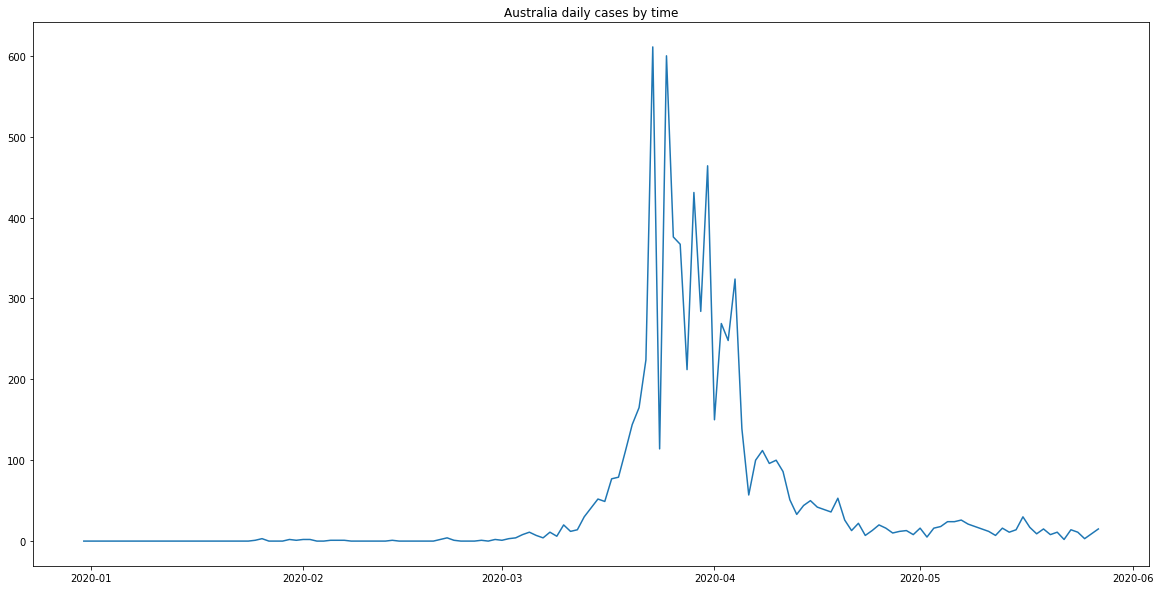

In [957]:
plt.figure(figsize=(20,10))
plt.title('Australia daily cases by time')
plt.plot(aus_daily_cases.index,aus_daily_cases.daily_cases)
AR1_pred.plot()
plt.legend(loc='best')


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
/anacon

2020-05-28     4.240607
2020-05-29     7.261663
2020-05-30    10.546585
2020-05-31    10.091993
2020-06-01     4.458492
2020-06-02     7.332520
2020-06-03    11.566830
2020-06-04     7.087430
2020-06-05     4.176694
2020-06-06    10.979726
2020-06-07     9.146268
2020-06-08     4.851187
2020-06-09     7.195371
2020-06-10    10.233792
Freq: D, dtype: float64

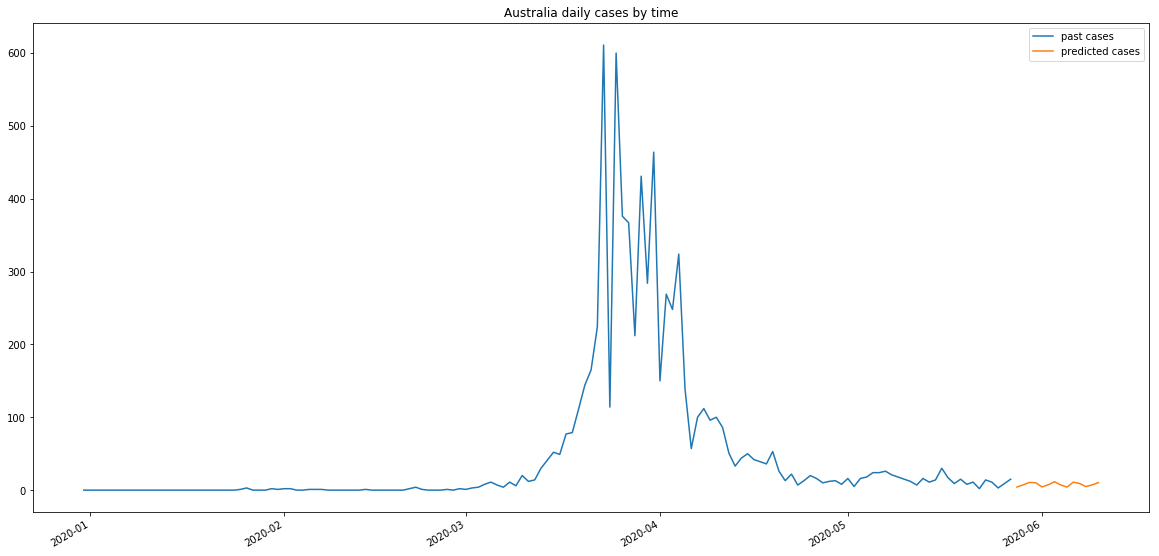

In [980]:
ar_model_by_country('Australia',30,'2020-05-28','2020-06-10')

In [47]:
def ar_model_by_country(country,n,start,end):
    
    country_daily_cases = daily_cases_by_country(country)
    country_daily_cases = pd.DataFrame({'daily_cases':country_daily_cases.daily_cases.values},index=country_daily_cases.index.get_level_values(1))
    
    train_values = country_daily_cases.tail(n).daily_cases
    train_dates = country_daily_cases.tail(n).index

    AR1 = AR(train_values, train_dates).fit()

    AR1_pred = AR1.predict(start=start, end = end)
    plt.figure(figsize=(20,10))
    plt.title(str(country+' daily cases by time'))
    plt.plot(country_daily_cases.index,country_daily_cases.daily_cases,label='past cases')
    AR1_pred.plot(label='predicted cases')
    plt.legend(loc='best')
    
    return AR1_pred
    

In [48]:
def select_best_order_by_country_cases(country):
    cases = datetime_cases_country(country)
    mod = ar_select_order(cases, maxlag=14, glob=True, seasonal=True)
    return mod.ar_lags[1]

In [49]:
def arma_model_by_country(country,n,start,end):
    
    country_daily_cases = daily_cases_by_country(country)
    country_daily_cases = pd.DataFrame({'daily_cases':country_daily_cases.daily_cases.values},index=country_daily_cases.index.get_level_values(1))
    
    train_values = country_daily_cases.tail(n).daily_cases
    train_dates = country_daily_cases.tail(n).index

    AR1 = ARMA(endog = train_values, dates = train_dates, order = (select_best_order_by_country_cases(country),0)).fit()

    AR1_pred = AR1.predict(start=start, end = end)
    
    plt.figure(figsize=(20,10))
    plt.plot(country_daily_cases.index,country_daily_cases.daily_cases)
    AR1_pred.plot()
    
    return AR1_pred

In [50]:
arma_model_by_country('China',30,'2020-05-28','2020-06-10')

NameError: name 'datetime_cases_country' is not defined

In [302]:
kor_daily_cases = daily_cases_by_country('South Korea')
jap_daily_cases = daily_cases_by_country('Japan')

In [303]:
kor_daily_cases = pd.DataFrame({'daily_cases':kor_daily_cases.daily_cases.values},index=kor_daily_cases.index.get_level_values(1))
jap_daily_cases = pd.DataFrame({'daily_cases':jap_daily_cases.daily_cases.values},index=jap_daily_cases.index.get_level_values(1))


In [304]:
kor_jap = pd.concat([kor_daily_cases,jap_daily_cases],axis=1)#.columns = ['k','j']
kor_jap.columns = ['Korea','Japan']

In [126]:
from statsmodels.tsa.api import VAR

In [305]:
kor_jap

,Korea,Japan
time,,
2019-12-31,0.0,0.0
2020-01-01,0.0,0.0
2020-01-02,0.0,0.0
2020-01-03,0.0,0.0
2020-01-04,0.0,0.0
...,...,...
2020-05-23,23.0,23.0
2020-05-24,25.0,14.0
2020-05-25,16.0,31.0


In [127]:
model = VAR(kor_jap)
model_fit = model.fit()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [128]:
pred = model_fit.forecast(model_fit.y, steps=10)
print(pred)

[[ 46.02623174  45.4638409 ]
 [ 50.99795098  59.39585164]
 [ 55.11224761  70.50488342]
 [ 58.52808814  79.35799832]
 [ 61.3738134   86.40878804]
 [ 63.75315026  92.02004057]
 [ 65.75003281  96.48188243]
 [ 67.43246988 100.02629939]
 [ 68.85564828 102.83875824]
 [ 70.06442363 105.06750816]]


/anaconda3/lib/python3.6/site-packages/statsmodels/base/wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


## Predictor variable

In [51]:
def fillna_predictor_variable(data):
    
    data.loc['2019-12-31',:] = data.loc['2019-12-31',:].fillna(0)
    return data.fillna(method='ffill',inplace=True)

In [52]:
fillna_predictor_variable(school_closures)
fillna_predictor_variable(workplace_closures)
fillna_predictor_variable(cancellation_of_public_events)
fillna_predictor_variable(restrictions_on_public_gatherings)
fillna_predictor_variable(public_information_campaigns)
fillna_predictor_variable(stay_at_home)
fillna_predictor_variable(restrictions_on_public_transport)
fillna_predictor_variable(restrictions_on_internal_movement)
fillna_predictor_variable(international_travel_controls)
fillna_predictor_variable(testing_policy)
fillna_predictor_variable(contact_tracing)

In [53]:
fillna_predictor_variable(government_stringency_index)

In [54]:
# Tests values
predictor_tests_values = [
                          total_tests.values,
                          daily_tests.values
]

In [55]:
# Government response values
predictor_response_values = [
                    school_closures.values,
                    workplace_closures.values,
                    cancellation_of_public_events.values,
                    restrictions_on_public_gatherings.values,
                    public_information_campaigns.values,
                    stay_at_home.values,
                    restrictions_on_public_transport.values, 
                    restrictions_on_internal_movement.values,
                    international_travel_controls.values,
                    testing_policy.values,
                    contact_tracing.values
                    ] 

In [56]:
# Government Stringency Index values
predictor_gov_values = [government_stringency_index.values]

In [57]:
# Xarray of tests dataframes
predictor_tests_var = [
              'total_tests',
              'daily_tests'
              ]

predictor_tests_covid_19 = xr.DataArray(predictor_tests_values, coords=[predictor_tests_var, time, countries], dims=['data','time','country'])

predictor_tests_covid_19

<xarray.DataArray (data: 2, time: 149, country: 207)>
array([[[   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        ...,
        [   nan,    nan,    nan, ...,    nan,    nan, 15765.],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        ...,
        [   nan,    nan,    nan, ...,    nan,    nan,   210.],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]]])
Coordinates:
  * data     (data) <U11 'total_tests' 'daily_tests'
  * time     (time) datetime64[ns] 2019-12-31 2020-01-01 ... 2020-05-27
  * country  (country) <U32 'Afghanistan' 'Albania' ... 'Zambia' 'Zimbabwe'

In [58]:
# Xarray of government responses dataframes
predictor_response_var = [
              'school_closures',
              'workplace_closures',
              'cancellation_of_public_events',
              'restrictions_on_public_gatherings',
              'public_information_campaigns',
              'stay_at_home',
              'restrictions_on_public_transport',
              'restrictions_on_internal_movement',
              'international_travel_controls',
              'testing_policy',
              'contact_tracing'
              ]

predictor_response_covid_19 = xr.DataArray(predictor_response_values, coords=[predictor_response_var, time, countries], dims=['data','time','country'])

predictor_response_covid_19

<xarray.DataArray (data: 11, time: 149, country: 207)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [3., 2., 3., ..., 3., 3., 3.],
        [3., 2., 3., ..., 3., 3., 3.],
        [3., 2., 3., ..., 3., 3., 3.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [3., 2., 2., ..., 0., 2., 3.],
        [3., 2., 2., ..., 0., 2., 3.],
        [3., 2., 2., ..., 0., 2., 3.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [2., 2., 2., ..., 2., 0., 2.],
        [2., 2., 2., ..., 2., 0., 2.],
        [2., 2., 2., ..., 2., 0., 2.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 4., 3., ..., 4., 2., 4.],
        [1., 4., 3., ..., 4., 2., 4.],
        [1., 4., 3., ..., 4., 2., 4.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 2., 0., ..., 0., 1., 1.],
        [1., 2., 0., ..., 0., 1., 1.],
        [1., 2., 0., ..., 0., 1., 1.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 1., 0., ..., 0., 2., 1.],
        [1., 1., 0., ..., 0., 2., 1.],
        [1., 1., 0., ..., 0., 2., 1.]]])
Coordinates:
  * data     (data) <U33 'school_closures' ... 'contact_tracing'
  * time     (time) datetime64[ns] 2019-12-31 2020-01-01 ... 2020-05-27
  * country  (country) <U32 'Afghanistan' 'Albania' ... 'Zambia' 'Zimbabwe'

In [59]:
# Xarray of government stringency index dataframes
predictor_gov_var = ['government_stringency_index']
              
predictor_gov_covid_19 = xr.DataArray(predictor_gov_values, coords=[predictor_gov_var, time, countries], dims=['data','time','country'])

predictor_gov_covid_19

<xarray.DataArray (data: 1, time: 149, country: 207)>
array([[[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
        ...,
        [78.7 , 83.33, 83.8 , ..., 50.93, 43.52, 87.96],
        [78.7 , 83.33, 83.8 , ..., 50.93, 43.52, 87.96],
        [78.7 , 83.33, 83.8 , ..., 50.93, 43.52, 87.96]]])
Coordinates:
  * data     (data) <U27 'government_stringency_index'
  * time     (time) datetime64[ns] 2019-12-31 2020-01-01 ... 2020-05-27
  * country  (country) <U32 'Afghanistan' 'Albania' ... 'Zambia' 'Zimbabwe'

In [ ]:
predictor_tests_covid_19
predictor_response_covid_19
predictor_gov_covid_19

## Time series analysis for predictor variables - VAR model

In [78]:
def response_by_country(country):
    
    school_closures = predictor_response_covid_19.sel(data=['school_closures'],country=country).to_dataframe('school_closures')
    workplace_closures = predictor_response_covid_19.sel(data=['workplace_closures'],country=country).to_dataframe('workplace_closures')
    cancellation_of_public_events = predictor_response_covid_19.sel(data=['cancellation_of_public_events'],country=country).to_dataframe('cancellation_of_public_events')
    restrictions_on_public_gatherings = predictor_response_covid_19.sel(data=['restrictions_on_public_gatherings'],country=country).to_dataframe('restrictions_on_public_gatherings')
    public_information_campaigns = predictor_response_covid_19.sel(data=['public_information_campaigns'],country=country).to_dataframe('public_information_campaigns')
    stay_at_home = predictor_response_covid_19.sel(data=['stay_at_home'],country=country).to_dataframe('stay_at_home')
    restrictions_on_public_transport = predictor_response_covid_19.sel(data=['restrictions_on_public_transport'],country=country).to_dataframe('restrictions_on_public_transport')
    restrictions_on_internal_movement = predictor_response_covid_19.sel(data=['restrictions_on_internal_movement'],country=country).to_dataframe('restrictions_on_internal_movement')
    international_travel_controls = predictor_response_covid_19.sel(data=['international_travel_controls'],country=country).to_dataframe('international_travel_controls')
    testing_policy = predictor_response_covid_19.sel(data=['testing_policy'],country=country).to_dataframe('testing_policy')
    contact_tracing = predictor_response_covid_19.sel(data=['contact_tracing'],country=country).to_dataframe('contact_tracing')
    
    return pd.DataFrame({'school_closures':school_closures.school_closures.values,
                         'workplace_closures':workplace_closures.workplace_closures.values,
                         'cancellation_of_public_events':cancellation_of_public_events.cancellation_of_public_events.values,
                         'restrictions_on_public_gatherings':restrictions_on_public_gatherings.restrictions_on_public_gatherings.values,
                         'public_information_campaigns':public_information_campaigns.public_information_campaigns.values,
                         'stay_at_home':stay_at_home.stay_at_home.values,
                         'restrictions_on_public_transport':restrictions_on_public_transport.restrictions_on_public_transport.values,
                         'restrictions_on_internal_movement':restrictions_on_internal_movement.restrictions_on_internal_movement.values,
                         'international_travel_controls':international_travel_controls.international_travel_controls.values,
                         'testing_policy':testing_policy.testing_policy.values,
                         'contact_tracing':contact_tracing.contact_tracing.values
                        },index=school_closures.index.get_level_values(1))

        

In [61]:
ss = StandardScaler()
pca = PCA()

In [81]:
pca_aus = PCA_gov_rp('Australia')

In [82]:
pca_aus[0]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,3.47101,2.727416,0.190378,0.049383,-0.053031,-0.022361,-0.013610,-0.004812,0.000211,-4.326704e-17,-1.447001e-18
1,3.47101,2.727416,0.190378,0.049383,-0.053031,-0.022361,-0.013610,-0.004812,0.000211,-4.326704e-17,-1.447001e-18
2,3.47101,2.727416,0.190378,0.049383,-0.053031,-0.022361,-0.013610,-0.004812,0.000211,-4.326704e-17,-1.447001e-18
3,3.47101,2.727416,0.190378,0.049383,-0.053031,-0.022361,-0.013610,-0.004812,0.000211,-4.326704e-17,-1.447001e-18
4,3.47101,2.727416,0.190378,0.049383,-0.053031,-0.022361,-0.013610,-0.004812,0.000211,-4.326704e-17,-1.447001e-18
...,...,...,...,...,...,...,...,...,...,...,...
144,-2.53732,-0.585766,1.713650,-0.290523,-0.186908,-0.147206,0.010282,-0.006820,0.003765,-2.173741e-17,-1.248714e-17
145,-2.53732,-0.585766,1.713650,-0.290523,-0.186908,-0.147206,0.010282,-0.006820,0.003765,-2.173741e-17,-1.248714e-17
146,-2.53732,-0.585766,1.713650,-0.290523,-0.186908,-0.147206,0.010282,-0.006820,0.003765,-2.173741e-17,-1.248714e-17
147,-2.53732,-0.585766,1.713650,-0.290523,-0.186908,-0.147206,0.010282,-0.006820,0.003765,-2.173741e-17,-1.248714e-17


In [83]:
pca_aus[1]

array([6.75846895e-01, 2.46013949e-01, 3.54019686e-02, 1.61895221e-02,
       1.17047572e-02, 8.81233030e-03, 3.40834105e-03, 2.22481753e-03,
       3.97418904e-04, 2.44110336e-33, 2.55695238e-36])

/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


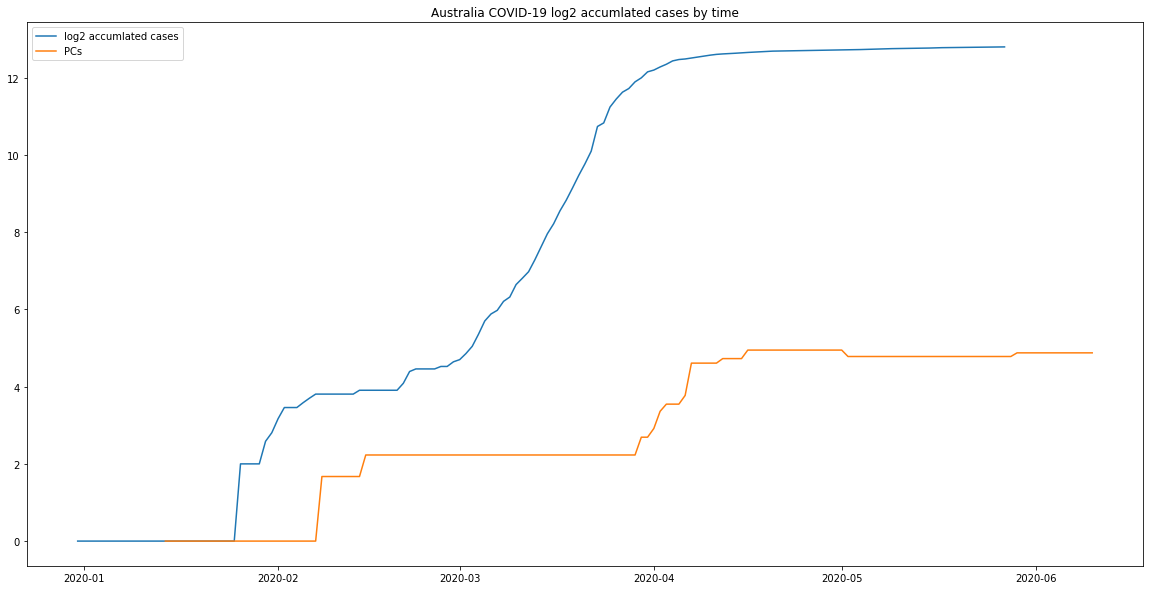

In [84]:
plt_log2total_pcs('Australia',pca_aus[2])

In [ ]:
A_gov_rp

In [80]:
def PCA_gov_rp(country):
    response = response_by_country(country)
    response_n = ss.fit_transform(response)
    pca.fit(response_n)
    hep_pcs = pca.transform(response_n)
    hep_pcs = pd.DataFrame(hep_pcs, 
                       columns=['PC'+str(i+1) for i in range(len(response.columns.values))],
                       )
    exp_var = pca.explained_variance_ratio_
    
    vital_pcs = -(hep_pcs['PC1']*exp_var[0]+hep_pcs['PC2']*exp_var[1])

    return hep_pcs, exp_var, vital_pcs

In [64]:
def cases_growth(country):
    cases_growth = pd.DataFrame(datetime_daily_cases_country(country).daily_cases/datetime_total_cases_country(country).shift(1).total_cases, columns=['growth'])
    cases_growth = cases_growth.fillna(0).replace([np.inf, -np.inf],0)
    return cases_growth

In [65]:
def log2_total_cases(country):
    log2_total_cases = datetime_total_cases_country(country).apply(lambda x:np.log2(x)).replace([np.inf, -np.inf],0)
    return log2_total_cases

In [66]:
def plt_growth_pcs(country,vital_pcs):
    
    cases_growth = pd.DataFrame(datetime_daily_cases_country(country).daily_cases/datetime_total_cases_country(country).shift(1).total_cases, columns=['growth'])
    cases_growth = cases_growth.fillna(0).replace([np.inf, -np.inf],0)
    vital_pcs = vital_pcs-vital_pcs[0]
    plt.figure(figsize=(20,10))
    plt.title(str(country)+' COVID-19 cases growth by time')
    plt.plot(cases_growth.index,cases_growth*10,label='cases growth')
    plt.plot(pd.date_range(start='2020-01-14',end='2020-06-10',freq='D'),vital_pcs,label='PCs')
    plt.legend(loc="best")


    plt.show()

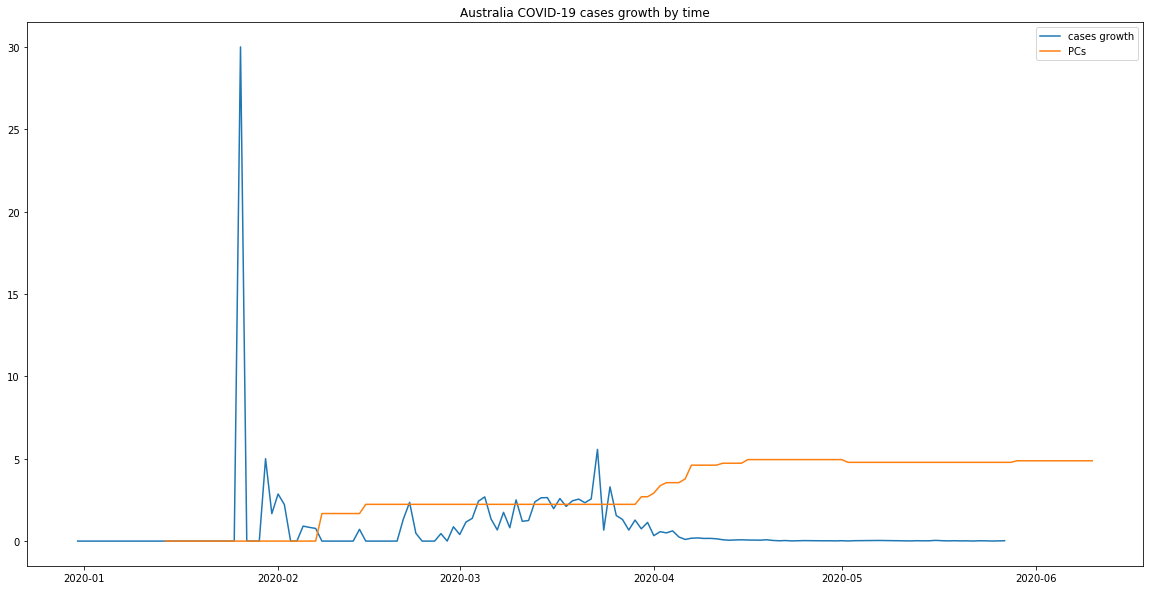

In [85]:
plt_growth_pcs('Australia',pca_aus[2])


In [69]:
def plt_log2total_pcs(country,vital_pcs):
    
    log2_total_cases = datetime_total_cases_country(country).apply(lambda x:np.log2(x)).replace([np.inf, -np.inf],0)
    vital_pcs = vital_pcs-vital_pcs[0]
    plt.figure(figsize=(20,10))
    plt.title(str(country)+' COVID-19 log2 accumlated cases by time')
    plt.plot(log2_total_cases.index,log2_total_cases, label='log2 accumlated cases')
    plt.plot(pd.date_range(start='2020-01-14',end='2020-06-10',freq='D'),vital_pcs,label='PCs')
    plt.legend(loc="best")
    plt.show()

In [70]:
plt_log2total_pcs('Australia',pca_aus[2])

NameError: name 'pca_aus' is not defined

In [71]:
def pcs_log2_cases(country,vital_pcs):
    
    vital_pcs = vital_pcs-vital_pcs[0]
    vital_pcs = pd.DataFrame(vital_pcs,columns=['PCs']).set_index(keys=pd.date_range(start='2020-01-14',end='2020-06-10',freq='D'))

    log2_total_cases = datetime_total_cases_country(country).apply(lambda x:np.log2(x)).replace([np.inf, -np.inf],0)
    
    log_pc = pd.concat([log2_total_cases,vital_pcs],axis=1).fillna(method='bfill').rename(columns={'total_cases':'log2_cases'})
    return log_pc

In [72]:
def pcs_daily_cases(country,vital_pcs):
    
    vital_pcs = vital_pcs-vital_pcs[0]
    vital_pcs = pd.DataFrame(vital_pcs,columns=['PCs']).set_index(keys=pd.date_range(start='2020-01-14',end='2020-06-10',freq='D'))

    daily_cases = abs(datetime_daily_cases_country(country))
    
    daily_cases_pc = pd.concat([daily_cases,vital_pcs],axis=1).fillna(method='bfill')
    
    return daily_cases_pc

In [73]:
def VAR_daily_analysis(country,data,n):
    model = VAR(data.head(149).tail(n))
    model_fit = model.fit()
    pred = model_fit.forecast(model_fit.y, steps=14)
    pred_cases = pd.DataFrame({'pred_cases':pred[:,0],'PCs':pred[:,1]},index=pd.date_range(start='2020-05-28',end='2020-06-10',freq='D'))
    mean_growth = (pred_cases['pred_cases'].mean(),pred_cases['PCs'].mean())
    
    return pred_cases,mean_growth


In [739]:
country = 'Spain'
esp_pcs = pcs_daily_cases(country,PCA_gov_rp(country)[2])

In [754]:
country = 'Australia'
pcs = pcs_daily_cases(country,PCA_gov_rp(country)[2])
VAR_daily_analysis(country,pcs,28)[1]

/anaconda3/lib/python3.6/site-packages/statsmodels/base/wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


(14.906227200122004, 4.780604495548423)

In [677]:
esp_pcs.isnull().sum()

daily_cases    14
PCs             0
dtype: int64

In [724]:
total = abs(datetime_daily_cases_country('Spain')).cumsum().rename(columns={'daily_cases':'total_cases'})

In [725]:
total

,total_cases
time,
2019-12-31,0.0
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
...,...
2020-05-23,236716.0
2020-05-24,237198.0
2020-05-25,237570.0


In [74]:
def pcs_log2_cases(country,vital_pcs):
    
    vital_pcs = vital_pcs-vital_pcs[0]
    vital_pcs = pd.DataFrame(vital_pcs,columns=['PCs']).set_index(keys=pd.date_range(start='2020-01-14',end='2020-06-10',freq='D'))
    total = abs(datetime_daily_cases_country(country)).cumsum().rename(columns={'daily_cases':'total_cases'})
    log2_total_cases = total.apply(lambda x:np.log2(x)).replace([np.inf, -np.inf],0)
    
    log_pc = pd.concat([log2_total_cases,vital_pcs],axis=1).fillna(method='bfill').rename(columns={'total_cases':'log2_cases'})
    return log_pc

In [75]:
def VAR_analysis(country,data):
    model = VAR(data.head(149).tail(60))
    model_fit = model.fit()
    pred = model_fit.forecast(model_fit.y, steps=14)
    pred_log2 = pd.DataFrame({'log2_cases':pred[:,0],'PCs':pred[:,1]},index=pd.date_range(start='2020-05-28',end='2020-06-10',freq='D'))
    pred_total_cases = pd.DataFrame(pred[:,0],index=pd.date_range(start='2020-05-28',end='2020-06-10',freq='D'),columns=['pred_total_cases']).apply(lambda x:np.exp2(x))
    mean_growth = (pred_log2['log2_cases'].diff(1).mean()*10,pred_log2['PCs'].mean())
    
    return pred_log2,pred_total_cases,mean_growth


In [775]:
covid_ranking = [
                'United States','Brazil','Russia','Spain','United Kingdom','India','Italy','Peru','Germany','Iran',
                'Turkey','France','Chile','Mexico','Saudi Arabia','Canada','Pakistan','China','Qatar','Bangladesh',
                'Belgium','Netherlands','Belarus','Sweden','Ecuador','Colombia','Singapore','United Arab Emirates',
                'Portugal','Egypt','Kuwait','Indonesia','Switzerland','Ukraine','Poland','Ireland','Argentina',
                'Philippines','Romania','Afghanistan','Dominican Republic','Israel','Japan','Austria','Oman',
                 'Panama','Bahrain','Bolivia','Armenia','Kazakhstan','Nigeria','Iraq','Denmark','Serbia',
                 'South Korea','Algeria','Moldova','Ghana','Czech Republic','Norway','Malaysia','Morocco',
                'Cameroon','Azerbaijan','Australia','Guatemala','Finland','Honduras','Sudan','Tajikistan',
                'Uzbekistan','Senegal','Djibouti','Guinea','Luxembourg','Democratic Republic of Congo','Hungary',
                "Cote d'Ivoire",'Nepal','Haiti','Thailand','Gabon','Macedonia','El Salvador','Greece','Kenya',
                 'Bulgaria','Bosnia and Herzegovina','Venezuela','Somalia','Croatia','Cuba','Ethiopia','Kyrgyzstan',
                'Estonia','Maldives','Sri Lanka','Iceland','Lithuania','Mali','Slovakia','New Zealand','Slovenia',
                'Guinea-Bissau','Lebanon','Costa Rica','South Sudan','Equatorial Guinea','Albania','Paraguay',
                 'Nicaragua','Zambia','Latvia','Tunisia','Madagascar','Mauritania','Niger','Sierra Leone','Cyprus',
                ]




In [76]:
def diff(first, second):
        second = set(second)
        return [item for item in first if item not in second]

In [885]:
diff(covid_ranking,list(data.index))

['Armenia',
 'Tajikistan',
 'Haiti',
 'Macedonia',
 'Maldives',
 'Guinea-Bissau',
 'Equatorial Guinea',
 'Latvia']

In [895]:
gdp_per_capita = [65111, 8796, 11162, 29961, 41030, 2171, 32946, 7046, 46563, 5506, 8957, 41760, 15399, 10118, 22865, 
                 46212, 1388, 10098, 69687, 1905, 45175, 52367, 6603, 51241, 6249, 6508, 63987, 37749, 23030, 3046, 
                 29266, 4163, 83716, 3592, 14901, 77771, 9887, 3294, 12482, 513, 8629, 42823, 40846, 50022, 16415, 
                 16245, 25273, 3670, 9139, 2222, 5738, 59795, 7397, 31430, 3980, 3300, 2223, 23213, 77975, 11136, 
                  3345, 1514, 4689, 53825, 4616, 48868, 2548, 714, 1831, 1427, 2936, 981, 113196, 500, 17463, 1691,
                 1047, 7791, 8112, 4008, 19974, 1997, 9518, 5741, 2547, 315, 14949, 8822, 953, 1292, 23523, 3946, 
                 67037, 19266, 924, 19547, 40634, 26170, 9654, 12014, 275, 5372, 5692, 1919, 1307, 3287, 463, 1392, 
                  405, 546, 27719]



In [896]:
len(gdp_per_capita)

111

In [897]:
len(list(data.index))

111

In [903]:
data['gdp_per_capita'] = gdp_per_capita 

In [912]:
data.head(30)

,avg_log2_growth,PCs,gdp_per_capita,gdp_per_capita
United States,0.044203,6.052900,65111,65111
Brazil,0.518500,-5.615873,8796,8796
Russia,0.313820,6.383295,11162,11162
Spain,-0.003302,4.851657,29961,29961
United Kingdom,0.109126,-3.639253,41030,41030
India,0.465260,6.064477,2171,2171
Italy,0.020292,4.034461,32946,32946
Peru,0.377566,-6.205467,7046,7046
Germany,0.001740,4.964076,46563,46563
Iran,0.056231,-3.376525,5506,5506


In [886]:
list(data.index)

['United States',
 'Brazil',
 'Russia',
 'Spain',
 'United Kingdom',
 'India',
 'Italy',
 'Peru',
 'Germany',
 'Iran',
 'Turkey',
 'France',
 'Chile',
 'Mexico',
 'Saudi Arabia',
 'Canada',
 'Pakistan',
 'China',
 'Qatar',
 'Bangladesh',
 'Belgium',
 'Netherlands',
 'Belarus',
 'Sweden',
 'Ecuador',
 'Colombia',
 'Singapore',
 'United Arab Emirates',
 'Portugal',
 'Egypt',
 'Kuwait',
 'Indonesia',
 'Switzerland',
 'Ukraine',
 'Poland',
 'Ireland',
 'Argentina',
 'Philippines',
 'Romania',
 'Afghanistan',
 'Dominican Republic',
 'Israel',
 'Japan',
 'Austria',
 'Oman',
 'Panama',
 'Bahrain',
 'Bolivia',
 'Kazakhstan',
 'Nigeria',
 'Iraq',
 'Denmark',
 'Serbia',
 'South Korea',
 'Algeria',
 'Moldova',
 'Ghana',
 'Czech Republic',
 'Norway',
 'Malaysia',
 'Morocco',
 'Cameroon',
 'Azerbaijan',
 'Australia',
 'Guatemala',
 'Finland',
 'Honduras',
 'Sudan',
 'Uzbekistan',
 'Senegal',
 'Djibouti',
 'Guinea',
 'Luxembourg',
 'Democratic Republic of Congo',
 'Hungary',
 "Cote d'Ivoire",
 'Nepa

In [ ]:
pcs = pcs_daily_cases(country,PCA_gov_rp(country)[2])
VAR_daily_analysis(country,pcs,28)[1]

In [776]:
avg_log2_growth = []
PCs = []
Countries = []
for country in covid_ranking:
    try:
        pcs = pcs_daily_cases(country,PCA_gov_rp(country)[2])
        mean_growth = VAR_daily_analysis(country,pcs,60)[1]
        avg_log2_growth.append(mean_growth[0])
        PCs.append(mean_growth[1])
        Countries.append(country)
        data = pd.DataFrame({'avg_growth':avg_log2_growth,'PCs':PCs},index=Countries)
    except:
        pass
data

/anaconda3/lib/python3.6/site-packages/statsmodels/base/wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/pca.py:425: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


,avg_growth,PCs
United States,26352.685882,6.067246
Brazil,15121.081962,-5.612250
Russia,9121.690966,6.171214
Spain,406.777720,4.870104
United Kingdom,4236.329668,-3.793084
...,...,...
Madagascar,9.835367,-5.741780
Mauritania,5.945114,-5.617179
Niger,18.028544,-3.705650
Sierra Leone,16.056290,-5.316690


In [774]:

data

,avg_growth,PCs
United States,26352.685882,6.067246
Brazil,15121.081962,-5.612250
Russia,9121.690966,6.171214
Spain,406.777720,4.870104
United Kingdom,4236.329668,-3.793084
...,...,...
Australia,22.688101,4.842156
Guatemala,165.835156,6.416185
Finland,91.588578,5.784056
Honduras,115.402252,6.190219


In [777]:
avg_log2_growth = []
PCs = []
Countries = []
for country in covid_ranking:
    try:
        mean_growth = VAR_analysis(country,pcs_log2_cases(country,PCA_gov_rp(country)[2]))[2]
        avg_log2_growth.append(mean_growth[0])
        PCs.append(mean_growth[1])
        Countries.append(country)
        data = pd.DataFrame({'avg_log2_growth':avg_log2_growth,'PCs':PCs},index=Countries)
    except:
        pass
data

/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/pca.py:425: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


,avg_log2_growth,PCs
United States,0.044203,6.052900
Brazil,0.518500,-5.615873
Russia,0.313820,6.383295
Spain,-0.003302,4.851657
United Kingdom,0.109126,-3.639253
...,...,...
Madagascar,0.874364,-5.059412
Mauritania,4.388240,-5.659107
Niger,-0.058745,-4.387000
Sierra Leone,0.379753,-5.640200


In [870]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

In [871]:
gc_res = grangercausalitytests(data, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4540  , p=0.5019  , df_denom=107, df_num=1
ssr based chi2 test:   chi2=0.4668  , p=0.4945  , df=1
likelihood ratio test: chi2=0.4658  , p=0.4949  , df=1
parameter F test:         F=0.4540  , p=0.5019  , df_denom=107, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9334  , p=0.3965  , df_denom=104, df_num=2
ssr based chi2 test:   chi2=1.9566  , p=0.3759  , df=2
likelihood ratio test: chi2=1.9392  , p=0.3792  , df=2
parameter F test:         F=0.9334  , p=0.3965  , df_denom=104, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3039  , p=0.2774  , df_denom=101, df_num=3
ssr based chi2 test:   chi2=4.1827  , p=0.2424  , df=3
likelihood ratio test: chi2=4.1037  , p=0.2505  , df=3
parameter F test:         F=1.3039  , p=0.2774  , df_denom=101, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3918  , p=0.2424  

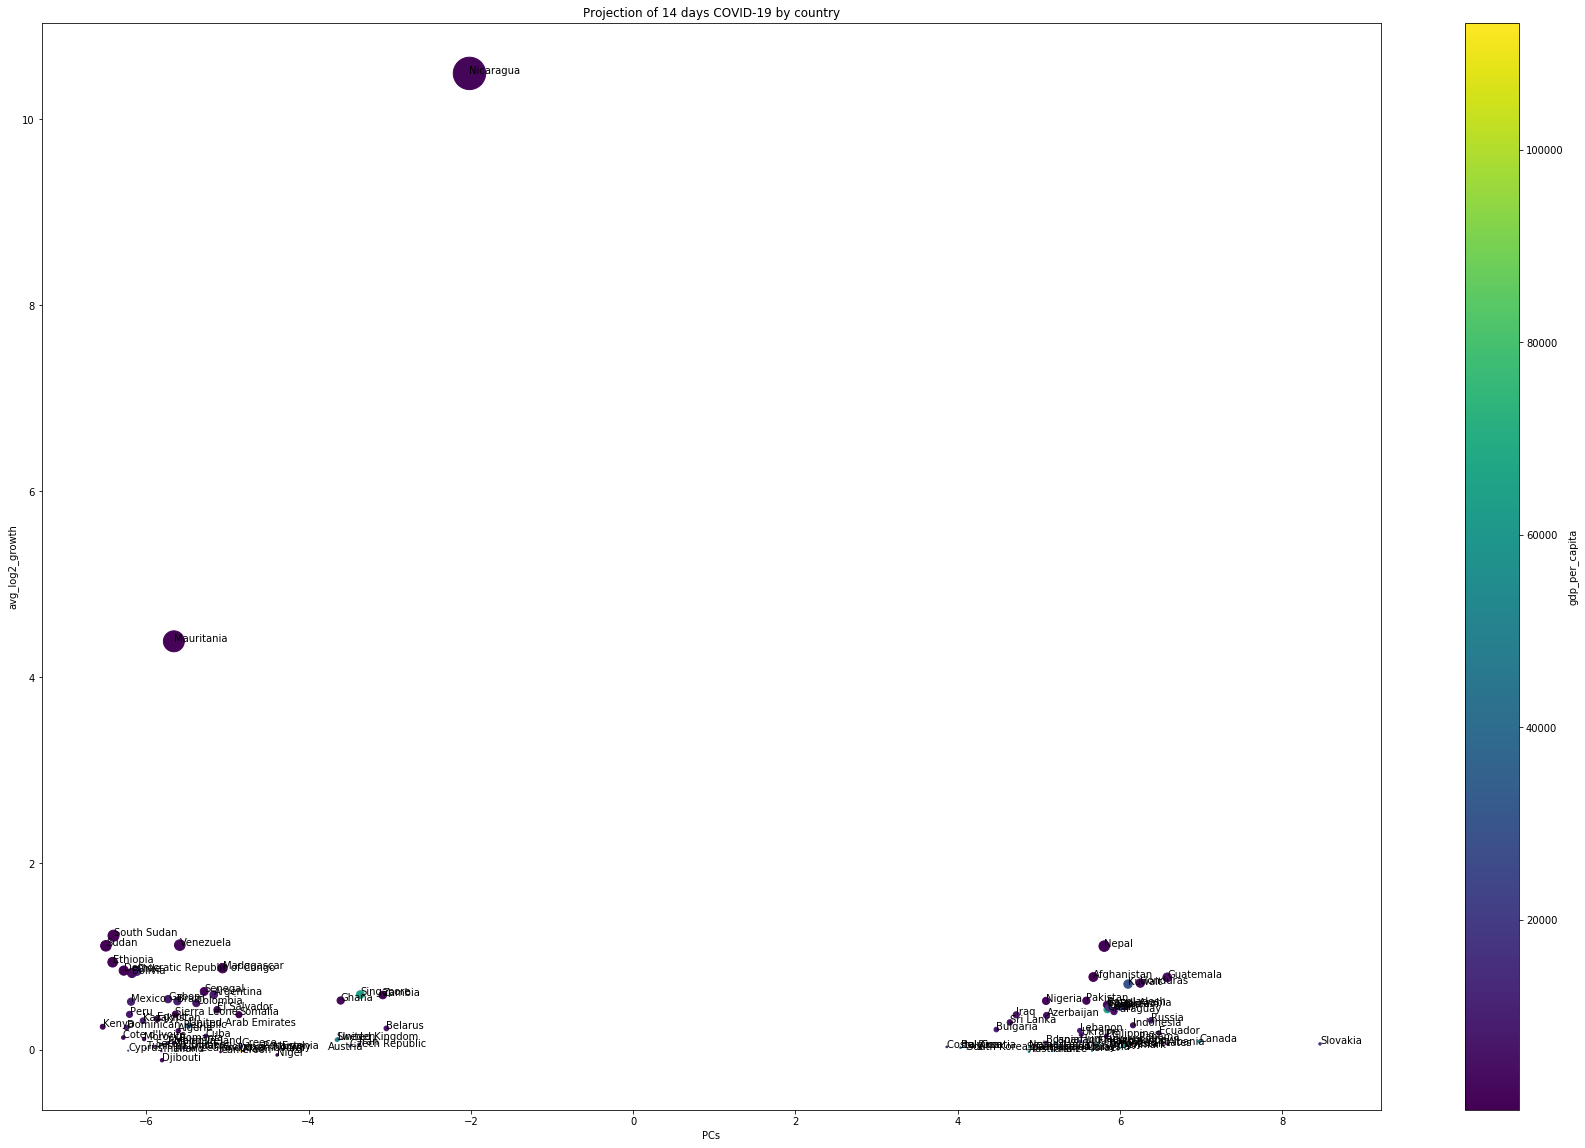

In [906]:
ax = data.plot.scatter(x='PCs',y='avg_log2_growth',figsize=(30,20),s=abs(data['avg_log2_growth'])*100,
                title='Projection of 14 days COVID-19 by country',c='gdp_per_capita',
                colormap='viridis'
                 )

for i, txt in enumerate(data.index):
    ax.annotate(txt, (data['PCs'][i], data['avg_log2_growth'][i]))
    

In [735]:
country = 'United States'
mean_growth = VAR_analysis(country,pcs_log2_cases(country,PCA_gov_rp(country)[2]))[2]
mean_growth

/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


(0.04420347897529098, 6.0528997930413615)

In [640]:
country = 'United Kingdom'
mean_growth = VAR_analysis(country,pcs_log2_cases(country,PCA_gov_rp(country)[2]))[2]
mean_growth

/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


(10.792798145843381, -3.6406792707074898)

In [641]:
country = 'Russia'
mean_growth = VAR_analysis(country,pcs_log2_cases(country,PCA_gov_rp(country)[2]))[2]
mean_growth

/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


(31.38197312448718, 6.383295380076445)

In [642]:
country = 'Brazil'
mean_growth = VAR_analysis(country,pcs_log2_cases(country,PCA_gov_rp(country)[2]))[2]
mean_growth

/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


(51.850025123886105, -5.61587309232115)

In [643]:
country = 'India'
mean_growth = VAR_analysis(country,pcs_log2_cases(country,PCA_gov_rp(country)[2]))[2]
mean_growth

/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


(46.525999212340494, 6.064477441935511)

In [650]:
country = 'Australia'
mean_growth = VAR_analysis(country,pcs_log2_cases(country,PCA_gov_rp(country)[2]))[2]
mean_growth

/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


(-2.3267006042876606, 4.877066554557885)

In [649]:
country = 'Taiwan'
mean_growth = VAR_analysis(country,pcs_log2_cases(country,PCA_gov_rp(country)[2]))[2]
mean_growth

/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


(1.1942519394788376, 3.8253099319403723)

In [644]:
country = 'Germany'
mean_growth = VAR_analysis(country,pcs_log2_cases(country,PCA_gov_rp(country)[2]))[2]
mean_growth

/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


(0.17404847218599045, 4.9640762292862854)

In [645]:
country = 'South Korea'
mean_growth = VAR_analysis(country,pcs_log2_cases(country,PCA_gov_rp(country)[2]))[2]
mean_growth

/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


(0.6381498812991173, 4.119687328601981)

In [646]:
country = 'Japan'
mean_growth = VAR_analysis(country,pcs_log2_cases(country,PCA_gov_rp(country)[2]))[2]
mean_growth

/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


(7.154737833581466, 5.201255670025355)

In [647]:
country = 'New Zealand'
mean_growth = VAR_analysis(country,pcs_log2_cases(country,PCA_gov_rp(country)[2]))[2]
mean_growth

/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


(-1.1694210259163969, -5.649279246956261)

In [648]:
country = 'Italy'
mean_growth = VAR_analysis(country,pcs_log2_cases(country,PCA_gov_rp(country)[2]))[2]
mean_growth

/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


(2.029203875057015, 4.034460782645264)

In [569]:
US_data = pcs_total_cases('United States',PCA_US[2])

/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [583]:
US_data.shape

(163, 2)

In [633]:
VAR_analysis('United States',US_data)[2]

/anaconda3/lib/python3.6/site-packages/statsmodels/base/wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


(4.420347897529098, 6.0528997930413615)

## DBSCAN

In [824]:
from sklearn import svm
from sklearn.model_selection import train_test_split

In [841]:
from sklearn import metrics


In [829]:
ds = ss.fit_transform(data.values)

In [856]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.2, min_samples = 2)
dbscan.fit(ds)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=1, p=None)

In [857]:
labels = dbscan.labels_ 

In [858]:
labels

array([ 0,  1,  0,  0,  1,  0,  0,  1,  0,  1,  0,  0,  2,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  1,  0,  1,  3,  1,  1,  1,  0,  0,  0,  0,
        1,  1,  1,  0,  1,  0,  1,  0,  0,  1,  0,  0,  0,  2,  1,  0,  0,
        0,  1,  0,  1,  1,  3,  1,  1,  0,  1,  1,  0,  0,  0,  0,  0,  2,
        0,  1,  1,  1,  1,  2,  0,  1, -1,  1,  1,  1,  1,  1,  0,  0,  2,
        1,  0,  1,  2,  0,  1,  0,  0,  1,  1, -1,  1,  1,  0,  0,  2,  0,
        0, -1,  3,  1,  2, -1,  1,  1,  1])

In [859]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

4


In [860]:
print(("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(data.values, labels)))

Silhouette Coefficient: 0.449


In [861]:
core_samples = np.zeros_like(labels, dtype = bool)  
core_samples[dbscan.core_sample_indices_] = True 
print(core_samples)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True False  True  True  True False
  True  True  True]


In [919]:
label_data = pd.DataFrame(labels,index=data.index)
dd = pd.concat([data,label_data],axis=1,ignore_index=True).rename({0:'avg_log2_growth',1:'PCs',2:'Group'})

In [928]:
ddd = dd.rename(columns={0:'avg_log2_growth',1:'PCs',3:'gdp_per_capita',4:'Group'})

In [992]:
ddd.drop([2],axis=1).head(75).tail(30)

,avg_log2_growth,PCs,gdp_per_capita,Group
Panama,0.110210,6.238424,16245,0
Bahrain,0.459264,5.998002,25273,0
Bolivia,0.822675,-6.175499,3670,2
Kazakhstan,0.310187,-6.040183,9139,1
Nigeria,0.522688,5.088203,2222,0
Iraq,0.373286,4.720316,5738,0
Denmark,0.019052,5.996252,59795,0
Serbia,0.035815,-5.889728,7397,1
South Korea,0.006381,4.119687,31430,0
Algeria,0.200418,-5.605448,3980,1


In [917]:
label_data = pd.DataFrame(labels,index=data.index)
pd.concat([data,label_data],axis=1,ignore_index=True).rename({'0':'avg_log2_growth','1':'PCs','2':'Group'})

,0,1,2,3,4
United States,0.044203,6.052900,65111,65111,0
Brazil,0.518500,-5.615873,8796,8796,1
Russia,0.313820,6.383295,11162,11162,0
Spain,-0.003302,4.851657,29961,29961,0
United Kingdom,0.109126,-3.639253,41030,41030,1
...,...,...,...,...,...
Madagascar,0.874364,-5.059412,463,463,2
Mauritania,4.388240,-5.659107,1392,1392,-1
Niger,-0.058745,-4.387000,405,405,1
Sierra Leone,0.379753,-5.640200,546,546,1


In [985]:
label

3

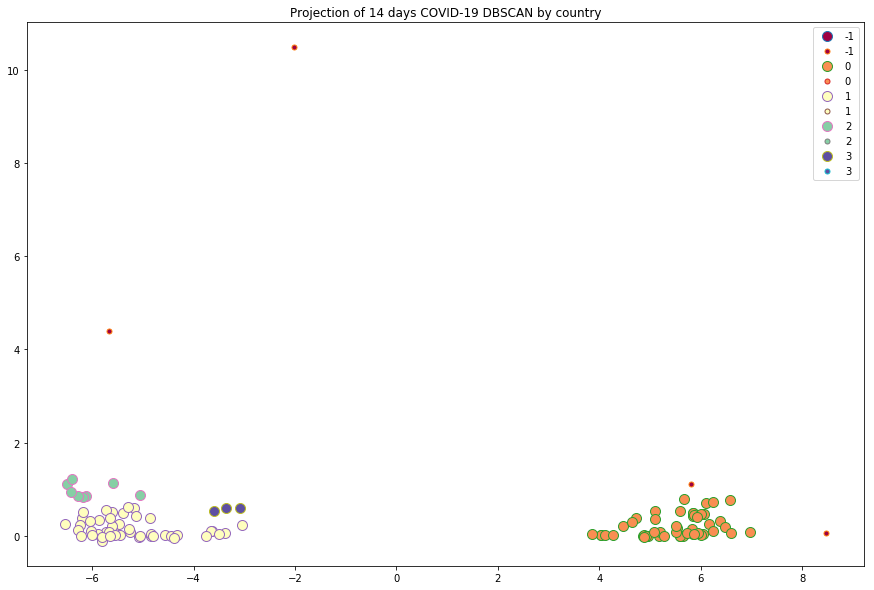

In [988]:
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))
plt.figure(figsize=(15,10))
plt.title('Projection of 14 days COVID-19 DBSCAN by country')
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    
    n = data.loc[class_member_mask & core_samples, :]
    plt.plot(n.iloc[:,1],n.iloc[:,0], 'o', markerfacecolor = color, markersize = 10, label=label)
    
    n = data.loc[class_member_mask & ~core_samples, :]
    plt.plot(n.iloc[:,1],n.iloc[:,0], 'o', markerfacecolor = color, markersize = 5, label=label)
plt.legend(loc='best')

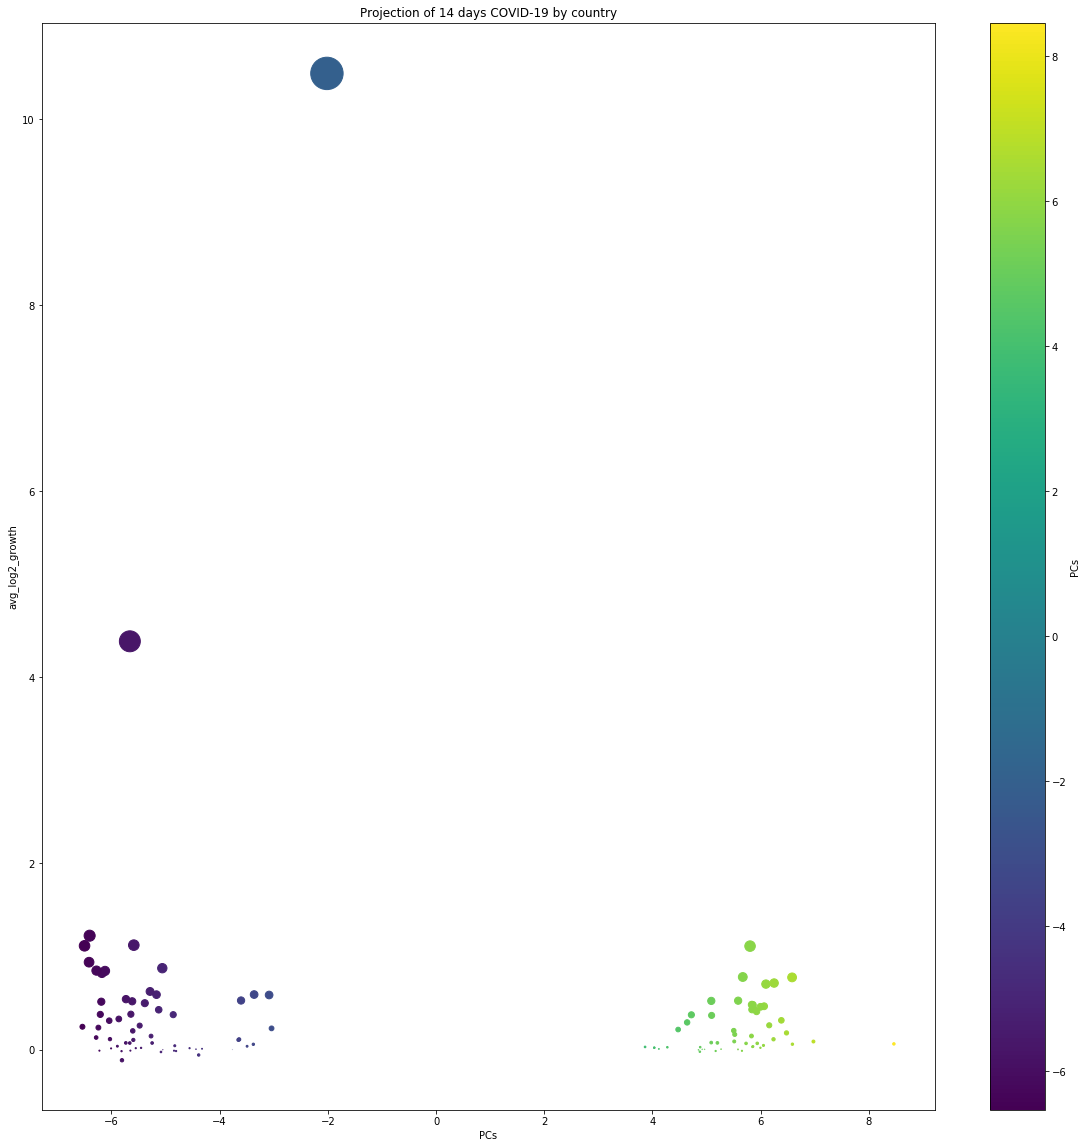

In [850]:
ax = data.plot.scatter(x='PCs',y='avg_log2_growth',figsize=(20,20),s=abs(data['avg_log2_growth'])*100,
                title='Projection of 14 days COVID-19 by country',c='PCs',
                colormap='viridis'
                 )

In [453]:
# Cases of Austrlia
target_covid_19.loc['daily_cases',:,'Australia']

<xarray.DataArray (time: 149)>
array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   1.,   3.,   0.,   0.,   0.,   2.,   1.,   2.,
         2.,   0.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
         0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   4.,   1.,
         0.,   0.,   0.,   1.,   0.,   2.,   1.,   3.,   4.,   8.,  11.,
         7.,   4.,  11.,   6.,  20.,  12.,  14.,  30.,  41.,  52.,  49.,
        77.,  79., 111., 144., 165., 224., 611., 114., 600., 376., 367.,
       212., 431., 284., 464., 150., 269., 248., 324., 139.,  57., 100.,
       112.,  96., 100.,  86.,  51.,  33.,  44.,  50.,  42.,  39.,  36.,
        53.,  26.,  13.,  22.,   7.,  13.,  20.,  16.,  10.,  12.,  13.,
         8.,  16.,   5.,  16.,  18.,  24.,  24.,  26.,  21.,  18.,  15.,
        12.,   7.,  16.,  11.,  14.,  30.,  17.,   9.,  15.,   8.,  11.,
         2.,  14.,  11.,   3.,   9.,  15.])
Coordinates:
    data     <U12 'daily_cases'
  * time     (time) datetime64[ns] 2019-12-31 2020-01-01 ... 2020-05-27
    country  <U32 'Australia'

In [456]:
aus_cases = target_covid_19.sel(data=['total_cases'],country='Australia').to_dataframe(name='total_cases')

In [457]:
aus_cases

country  total_cases
data        time                              
total_cases 2019-12-31  Australia          0.0
            2020-01-01  Australia          0.0
            2020-01-02  Australia          0.0
            2020-01-03  Australia          0.0
            2020-01-04  Australia          0.0
...                           ...          ...
            2020-05-23  Australia       7095.0
            2020-05-24  Australia       7106.0
            2020-05-25  Australia       7109.0
            2020-05-26  Australia       7118.0
            2020-05-27  Australia       7133.0

[149 rows x 2 columns]

In [173]:
jap_cases.reset_index()['space'][0]


'Japan'

In [158]:
jap_cases.index.get_level_values('time')

DatetimeIndex(['2019-12-31', '2020-01-01', '2020-01-02', '2020-01-03',
               '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09',
               ...
               '2020-04-28', '2020-04-29', '2020-04-30', '2020-05-01',
               '2020-05-02', '2020-05-03', '2020-05-04', '2020-05-05',
               '2020-05-06', '2020-05-07'],
              dtype='datetime64[ns]', name='time', length=129, freq=None)

In [112]:
jap_cases = covid_19.sel(var=['cases'],space=['Japan']).to_dataframe(name='confirmed_cases')

(array([18261, 18262, 18293, 18322, 18353, 18383, 18389]),
 <a list of 7 Text xticklabel objects>)

<Figure size 432x288 with 0 Axes>

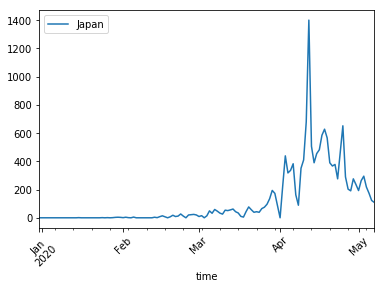

In [174]:
plt.figure()
jap_cases.reset_index().plot(x='time',y='confirmed_cases') 
plt.legend(jap_cases.reset_index()['space'],loc='best')
plt.xticks(rotation=45) 

In [136]:
skor_cases = covid_19.sel(var=['cases'],space=['South Korea']).to_dataframe(name='confirmed_cases')

In [398]:
def plot_confirmed_cases(country):
    
    confirmed_cases = target_covid_19.sel(var=['daily_cases'],space=[country]).to_dataframe(name='daily_cases')
    
    plt.figure()
    confirmed_cases.reset_index().plot(x='time',y='daily_cases') # select data based on columns
    
    plt.legend(confirmed_cases.reset_index()['space'],loc='best')
    plt.xticks(rotation=45) 
    
    return plot_confirmed_cases


In [400]:
def plot_cumulative_cases(country):
    
    confirmed_cases = target_covid_19.sel(var=['total_cases'],space=[country]).to_dataframe(name='total_cases')
    
    plt.figure()
    confirmed_cases.reset_index().plot(x='time',y='total_cases') # select data based on columns
    
    plt.legend(confirmed_cases.reset_index()['space'],loc='best')
    plt.xticks(rotation=45) 
    
    return plot_confirmed_cases

In [403]:
def plot_confirmed_deaths(country):
    
    confirmed_cases = target_covid_19.sel(var=['daily_deaths'],space=[country]).to_dataframe(name='daily_deaths')
    
    plt.figure()
    confirmed_cases.reset_index().plot(x='time',y='daily_deaths') # select data based on columns
    
    plt.legend(confirmed_cases.reset_index()['space'],loc='best')
    plt.xticks(rotation=45) 
    
    return plot_confirmed_cases

In [402]:
def plot_cumulative_deaths(country):
    
    confirmed_cases = target_covid_19.sel(var=['total_deaths'],space=[country]).to_dataframe(name='total_deaths')
    
    plt.figure()
    confirmed_cases.reset_index().plot(x='time',y='total_deaths') # select data based on columns
    
    plt.legend(confirmed_cases.reset_index()['space'],loc='best')
    plt.xticks(rotation=45) 
    
    return plot_confirmed_cases

In [734]:
def compare_two_countries(country1,country2):

    confirmed_cases1 = covid_19.sel(var=['cases'],space=[country1]).to_dataframe(name='confirmed_cases')
    confirmed_cases2 = covid_19.sel(var=['cases'],space=[country2]).to_dataframe(name='confirmed_cases')

    plt.figure()
    ax = confirmed_cases1.reset_index().plot(x='time',y='confirmed_cases') # select data based on columns
    confirmed_cases2.reset_index().plot(x='time',y='confirmed_cases',figsize=(10,10),ax=ax) # select data based on columns
    
    plt.legend([confirmed_cases1.reset_index()['space'][0],confirmed_cases2.reset_index()['space'][0]],loc='best',fontsize=15)
    plt.xticks(fontsize=15, rotation=45)
    plt.yticks(fontsize=15)
    plt.show()

In [737]:
def compare_three_countries(country1,country2, country3):

    confirmed_cases1 = covid_19.sel(var=['cases'],space=[country1]).to_dataframe(name='confirmed_cases')
    confirmed_cases2 = covid_19.sel(var=['cases'],space=[country2]).to_dataframe(name='confirmed_cases')
    confirmed_cases3 = covid_19.sel(var=['cases'],space=[country3]).to_dataframe(name='confirmed_cases')
    plt.figure()
    ax = confirmed_cases1.reset_index().plot(x='time',y='confirmed_cases') # select data based on columns
    confirmed_cases2.reset_index().plot(x='time',y='confirmed_cases',ax=ax) # select data based on columns
    confirmed_cases3.reset_index().plot(x='time',y='confirmed_cases',figsize=(10,10),ax=ax)
    
    plt.legend([confirmed_cases1.reset_index()['space'][0],confirmed_cases2.reset_index()['space'][0],confirmed_cases3.reset_index()['space'][0]],loc='best',fontsize=15)
    plt.xticks(fontsize=15, rotation=45)
    plt.yticks(fontsize=15)
    plt.show()

In [739]:
def compare_four_countries(country1,country2, country3, country4):

    confirmed_cases1 = covid_19.sel(var=['cases'],space=[country1]).to_dataframe(name='confirmed_cases')
    confirmed_cases2 = covid_19.sel(var=['cases'],space=[country2]).to_dataframe(name='confirmed_cases')
    confirmed_cases3 = covid_19.sel(var=['cases'],space=[country3]).to_dataframe(name='confirmed_cases')
    confirmed_cases4 = covid_19.sel(var=['cases'],space=[country4]).to_dataframe(name='confirmed_cases')
    plt.figure()
    ax = confirmed_cases1.reset_index().plot(x='time',y='confirmed_cases') # select data based on columns
    confirmed_cases2.reset_index().plot(x='time',y='confirmed_cases',ax=ax) # select data based on columns
    confirmed_cases3.reset_index().plot(x='time',y='confirmed_cases',ax=ax)
    confirmed_cases4.reset_index().plot(x='time',y='confirmed_cases',figsize=(10,10),ax=ax)
    plt.legend([confirmed_cases1.reset_index()['space'][0],confirmed_cases2.reset_index()['space'][0],confirmed_cases3.reset_index()['space'][0],confirmed_cases4.reset_index()['space'][0]],loc='best',fontsize=15)
    plt.xticks(fontsize=15, rotation=45)
    plt.yticks(fontsize=15)
    plt.show()

<function __main__.plot_confirmed_cases(country)>

<Figure size 432x288 with 0 Axes>

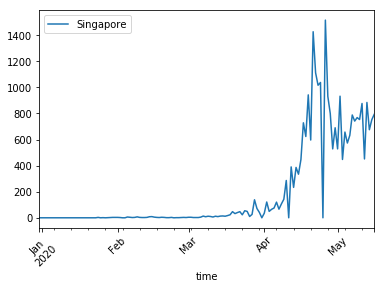

In [406]:
plot_confirmed_cases('Singapore')

<function __main__.plot_confirmed_cases(country)>

<Figure size 432x288 with 0 Axes>

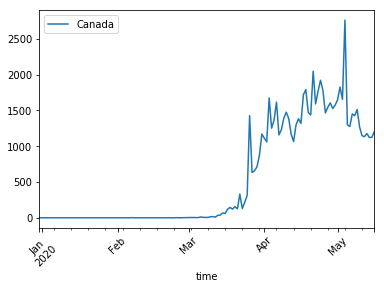

In [439]:
plot_confirmed_cases('Canada')

<function __main__.plot_confirmed_cases(country)>

<Figure size 432x288 with 0 Axes>

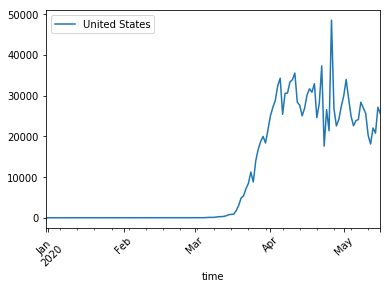

In [440]:
plot_confirmed_cases('United States')

<function __main__.plot_confirmed_cases(country)>

<Figure size 432x288 with 0 Axes>

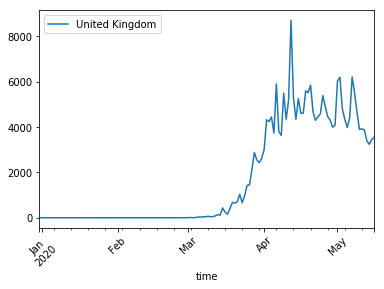

In [441]:
plot_confirmed_cases('United Kingdom')

<function __main__.plot_confirmed_cases(country)>

<Figure size 432x288 with 0 Axes>

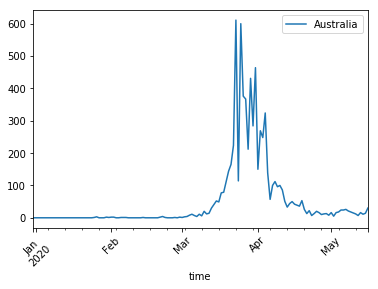

In [399]:
plot_confirmed_cases('Australia')

<function __main__.plot_confirmed_cases(country)>

<Figure size 432x288 with 0 Axes>

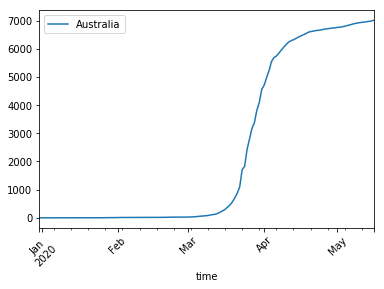

In [401]:
plot_cumulative_cases('Australia')

<function __main__.plot_confirmed_cases(country)>

<Figure size 432x288 with 0 Axes>

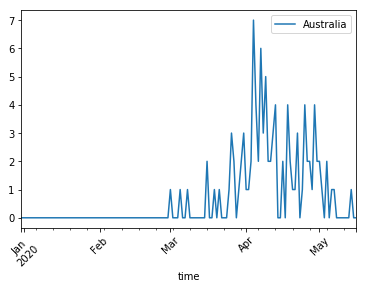

In [404]:
plot_confirmed_deaths('Australia')

<function __main__.plot_confirmed_cases(country)>

<Figure size 432x288 with 0 Axes>

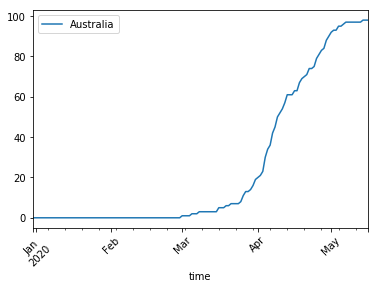

In [405]:
plot_cumulative_deaths('Australia')

<Figure size 432x288 with 0 Axes>

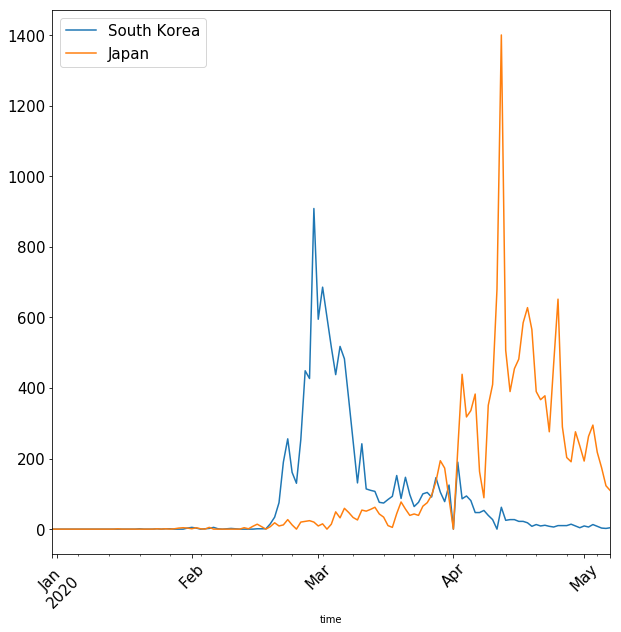

In [731]:
compare_two_countries('South Korea','Japan')

<Figure size 432x288 with 0 Axes>

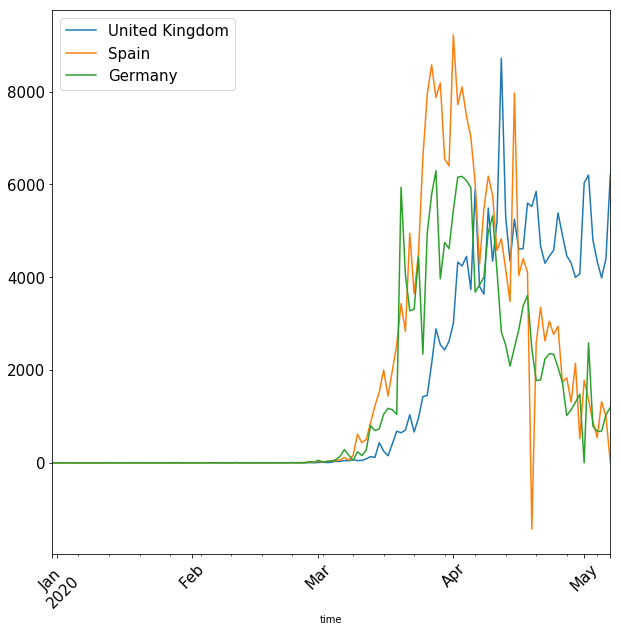

In [741]:
compare_three_countries('United Kingdom','Spain','Germany')

<Figure size 432x288 with 0 Axes>

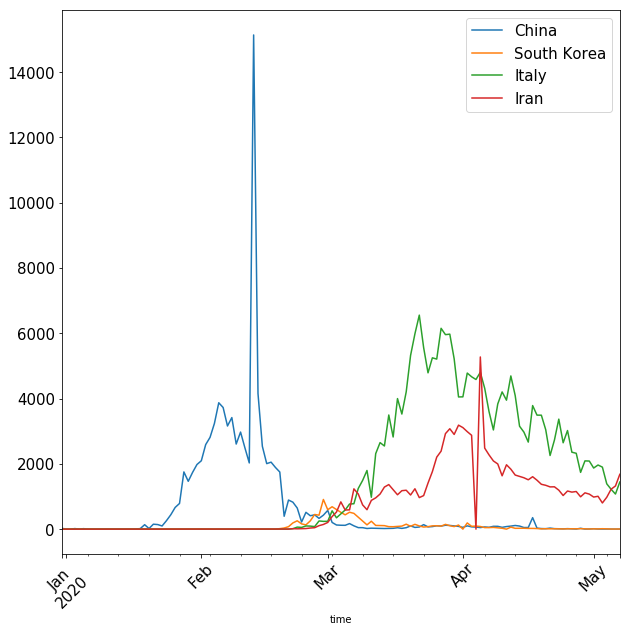

In [740]:
compare_four_countries('China','South Korea','Italy','Iran')

<function __main__.plot_confirmed_cases(country)>

<Figure size 432x288 with 0 Axes>

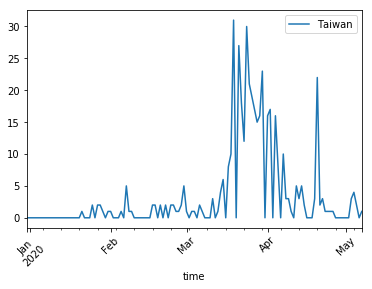

<Figure size 432x288 with 0 Axes>

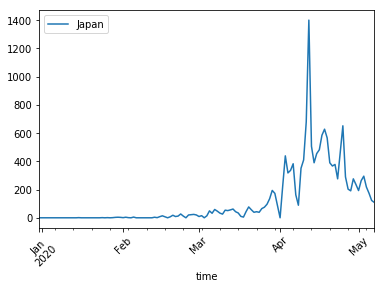

In [177]:
plot_confirmed_cases('Taiwan')
plot_confirmed_cases('Japan')


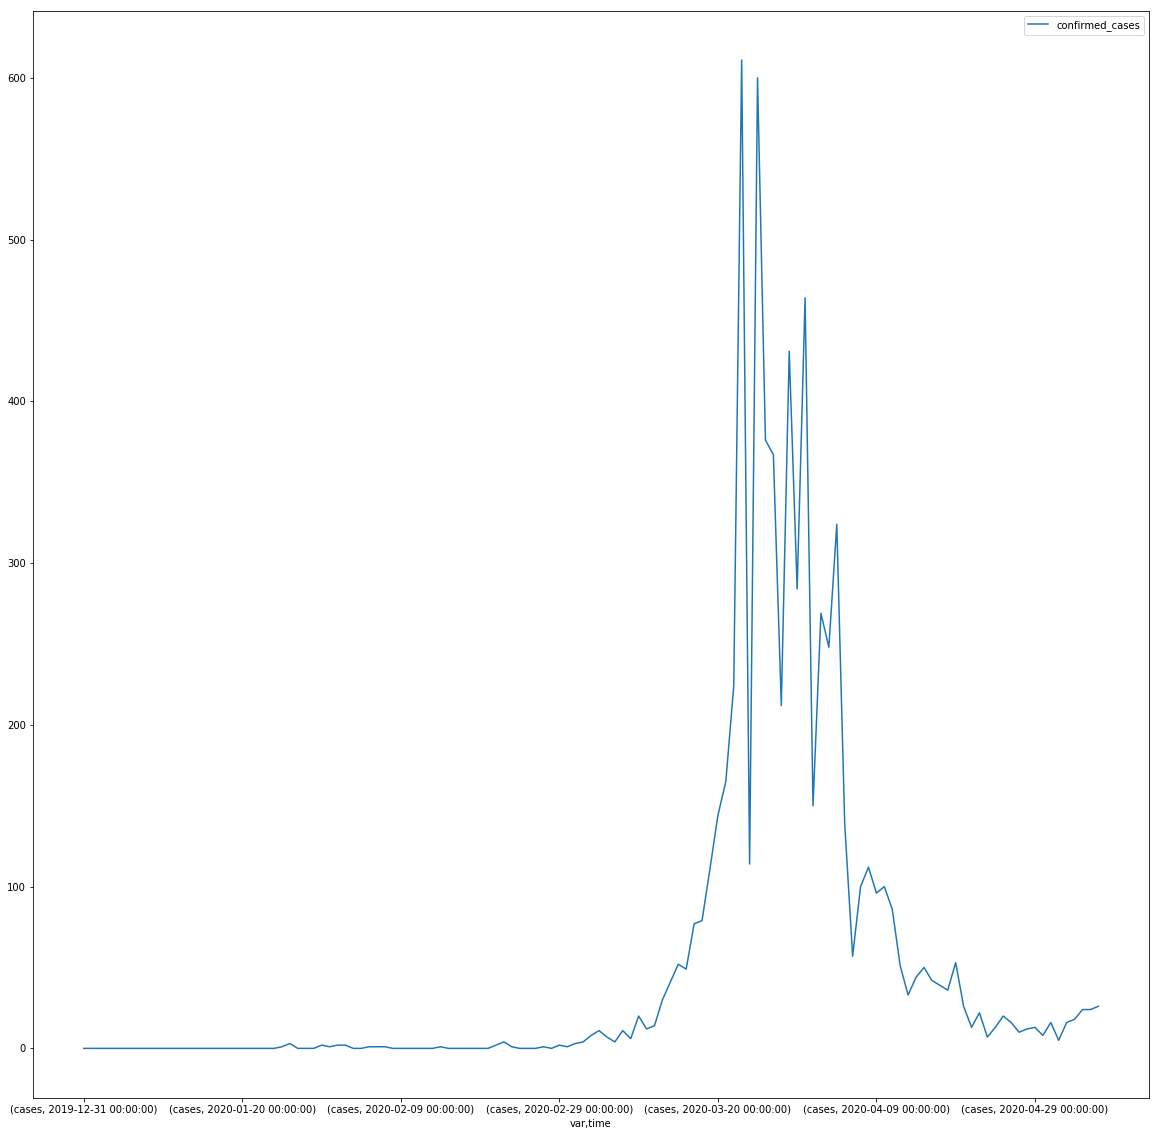

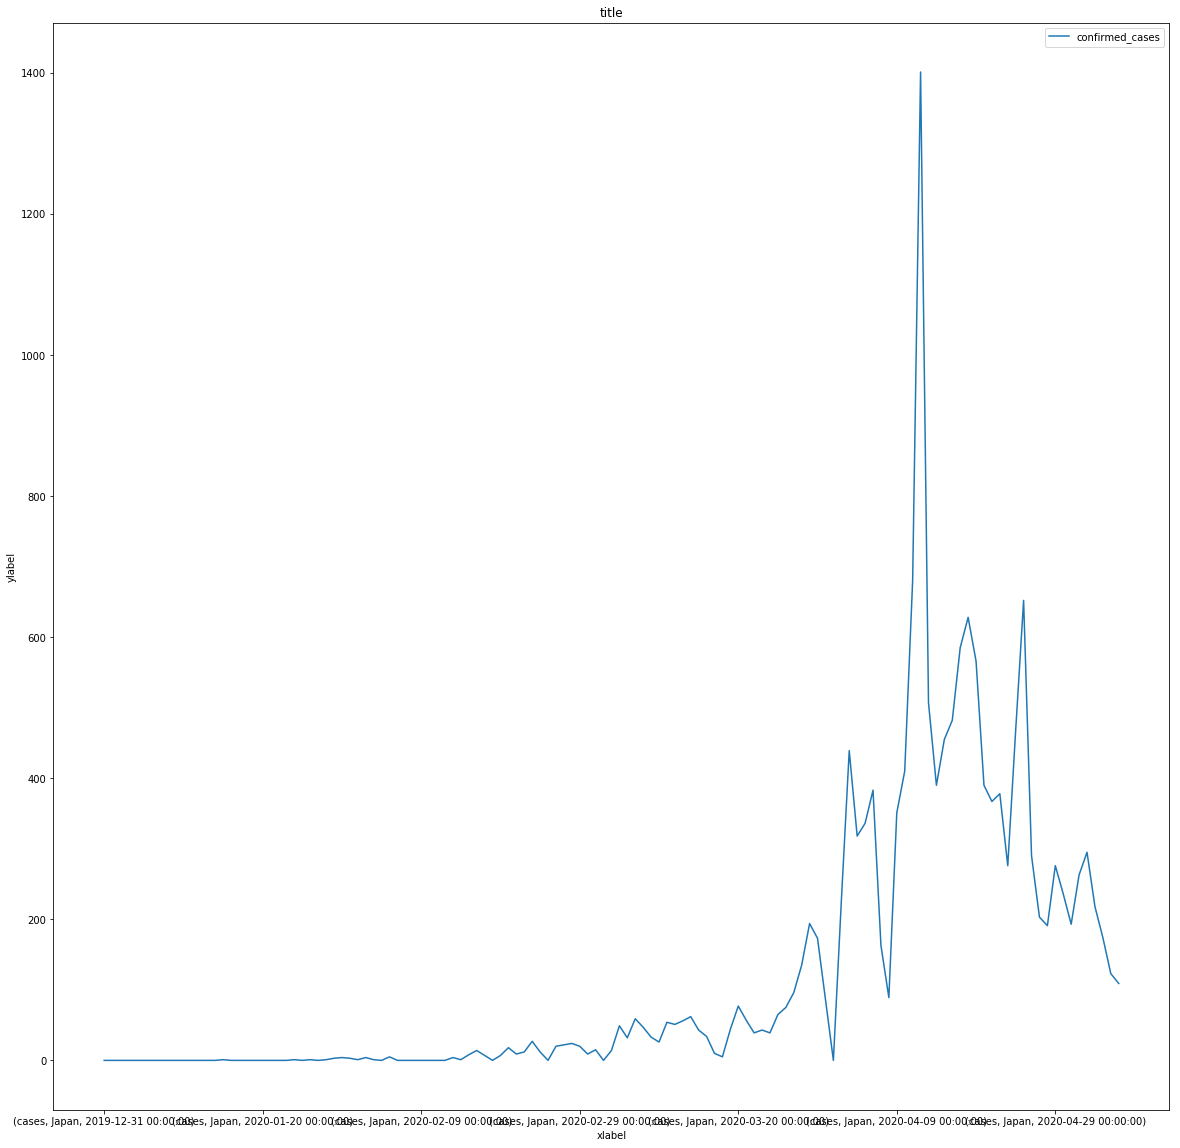

In [118]:
%matplotlib inline

aus_cases.plot(figsize=(20,20))
jap_cases.plot(figsize=(20,20))
plt.title('title')
plt.legend()
plt.show()

In [97]:
covid_19.sel(var='cases',space='Australia').to_dataframe(name='confirmed_cases')['confirmed_cases'].sum()

6875.0

In [73]:
covid_19.loc['cases','Australia',:].values.sum()

6875.0

In [83]:
covid_19.loc['cases','United States',:].values.sum()

1228603.0

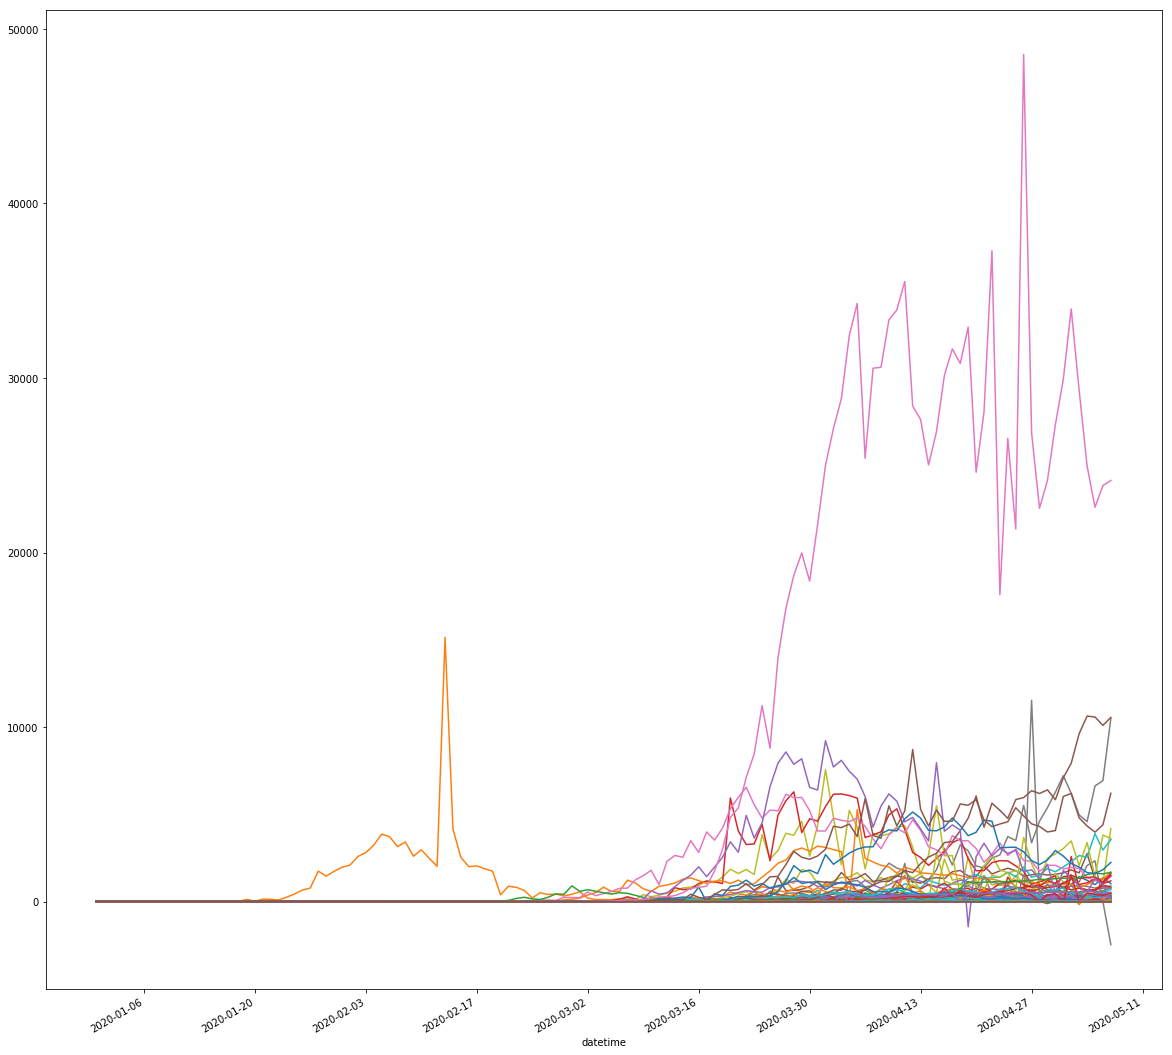

In [84]:
%matplotlib inline

new_daily_cases.plot(figsize=(20,20),legend = False)

In [ ]:
import matplotlib

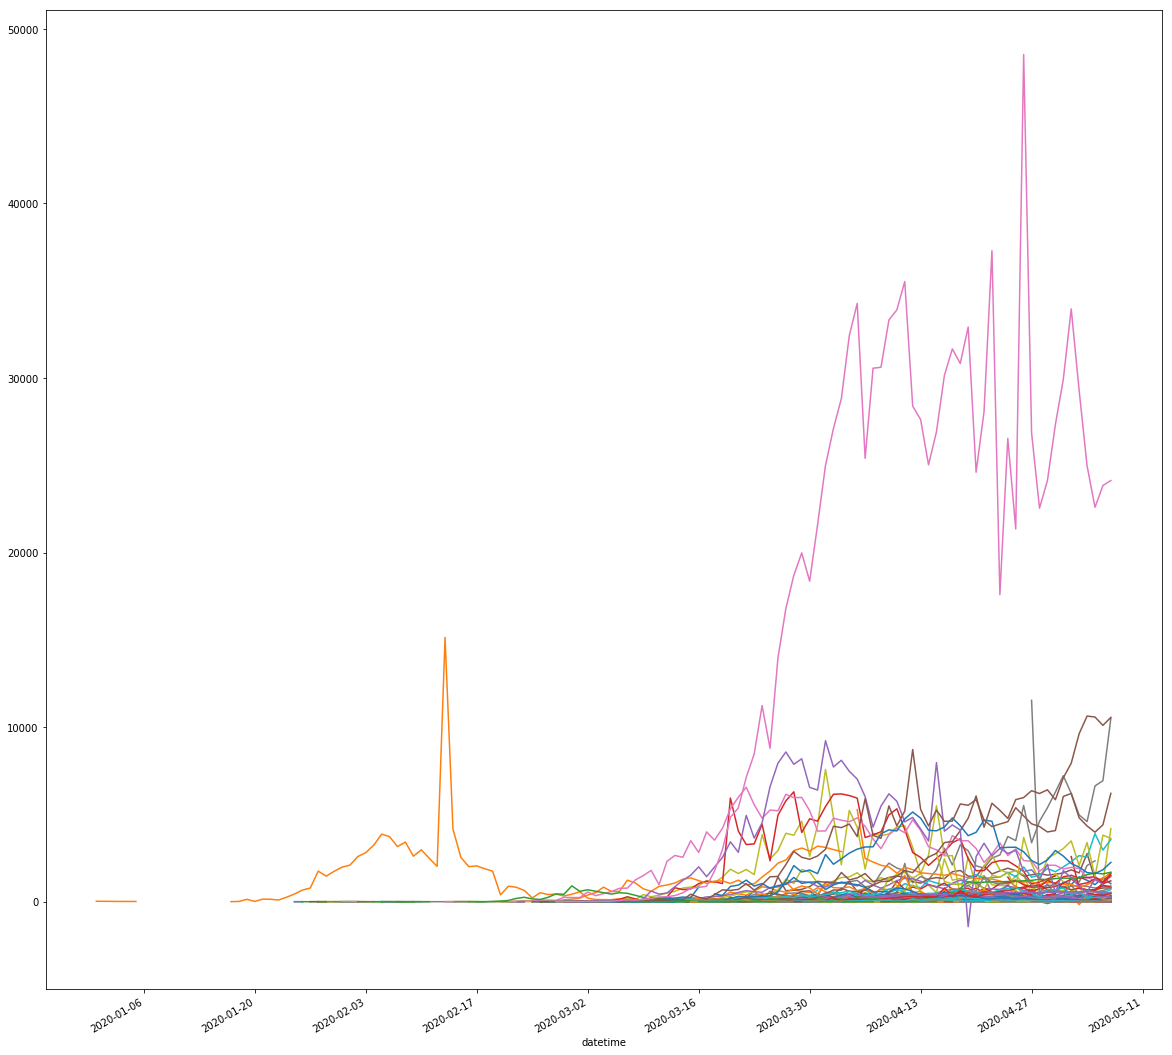

In [83]:
%matplotlib inline


daily_cases.groupby(['datetime','Entity']).mean().unstack().plot(figsize=(20,20),legend = False)




In [23]:
%matplotlib inline


daily_cases.groupby(['datetime','Entity']).ffill()
#.unstack().plot(figsize=(20,20),legend = False)



,datetime,Entity,Code,Date,Daily confirmed cases (cases)
0,2020-02-25,Afghanistan,AFG,"Feb 25, 2020",1
1,2020-03-08,Afghanistan,AFG,"Mar 8, 2020",3
2,2020-03-11,Afghanistan,AFG,"Mar 11, 2020",3
3,2020-03-15,Afghanistan,AFG,"Mar 15, 2020",3
4,2020-03-16,Afghanistan,AFG,"Mar 16, 2020",6
5,2020-03-17,Afghanistan,AFG,"Mar 17, 2020",5
6,2020-03-18,Afghanistan,AFG,"Mar 18, 2020",1
7,2020-03-21,Afghanistan,AFG,"Mar 21, 2020",2
8,2020-03-23,Afghanistan,AFG,"Mar 23, 2020",10
9,2020-03-24,Afghanistan,AFG,"Mar 24, 2020",6


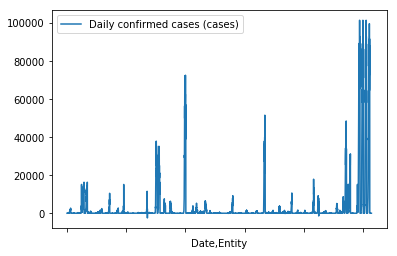

In [15]:
%matplotlib inline
daily_cases.set_index(['Date','Entity']).plot()


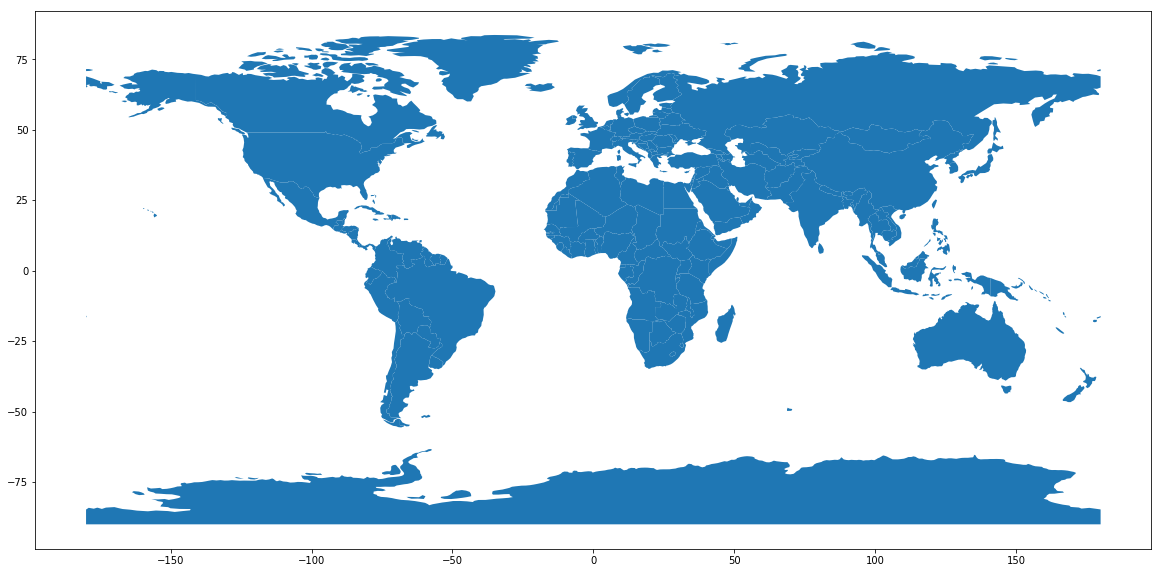

In [567]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot(figsize=(20,20))
plt.show()

In [568]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


In [569]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


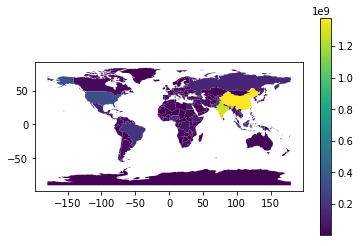

In [609]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(1, 1)
world.plot(column= 'pop_est', ax=ax, legend=True)
plt.show()

In [580]:
target_covid_19

<xarray.DataArray (var: 4, space: 207, time: 138)>
array([[[0.000e+00, 0.000e+00, 0.000e+00, ..., 2.590e+02, 1.130e+02,
         1.063e+03],
        [      nan,       nan,       nan, ..., 4.000e+00, 1.800e+01,
         1.800e+01],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.860e+02, 1.890e+02,
         1.870e+02],
        ...,
        [      nan,       nan,       nan, ..., 3.000e+00, 1.700e+01,
         1.900e+01],
        [      nan,       nan,       nan, ..., 5.000e+00, 2.080e+02,
         1.400e+01],
        [      nan,       nan,       nan, ..., 0.000e+00, 0.000e+00,
         5.000e+00]],

       [[0.000e+00, 0.000e+00, 0.000e+00, ..., 3.000e+00, 6.000e+00,
         3.200e+01],
        [      nan,       nan,       nan, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 7.000e+00, 7.000e+00,
         7.000e+00],
        ...,
        [      nan,       nan,       nan, ..., 1.000e+00, 1.000e+00,
         2.000e+00],
        [      nan,       nan,       nan, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [      nan,       nan,       nan, ..., 0.000e+00, 0.000e+00,
         0.000e+00]],

       [[0.000e+00, 0.000e+00, 0.000e+00, ..., 5.226e+03, 5.339e+03,
         6.402e+03],
        [      nan,       nan,       nan, ..., 8.800e+02, 8.980e+02,
         9.160e+02],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 6.253e+03, 6.442e+03,
         6.629e+03],
        ...,
        [      nan,       nan,       nan, ..., 7.000e+01, 8.700e+01,
         1.060e+02],
        [      nan,       nan,       nan, ..., 4.460e+02, 6.540e+02,
         6.680e+02],
        [      nan,       nan,       nan, ..., 3.700e+01, 3.700e+01,
         4.200e+01]],

       [[0.000e+00, 0.000e+00, 0.000e+00, ..., 1.300e+02, 1.360e+02,
         1.680e+02],
        [      nan,       nan,       nan, ..., 3.100e+01, 3.100e+01,
         3.100e+01],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 5.220e+02, 5.290e+02,
         5.360e+02],
        ...,
        [      nan,       nan,       nan, ..., 1.200e+01, 1.300e+01,
         1.500e+01],
        [      nan,       nan,       nan, ..., 7.000e+00, 7.000e+00,
         7.000e+00],
        [      nan,       nan,       nan, ..., 4.000e+00, 4.000e+00,
         4.000e+00]]])
Coordinates:
  * var      (var) <U12 'daily_cases' 'daily_deaths' ... 'total_deaths'
  * space    (space) <U32 'Afghanistan' 'Albania' ... 'Zambia' 'Zimbabwe'
  * time     (time) datetime64[ns] 2019-12-31 2020-01-01 ... 2020-05-16

In [584]:
world_cases_real_time = target_covid_19.sel(var=['total_cases'], time='2020-05-16').to_dataframe(name='total_cases')

In [587]:
world_cases_real_time.reset_index(inplace=True)

In [588]:
world_cases_real_time

,var,space,time,total_cases
0,total_cases,Afghanistan,2020-05-16,6402.0
1,total_cases,Albania,2020-05-16,916.0
2,total_cases,Algeria,2020-05-16,6629.0
3,total_cases,Andorra,2020-05-16,761.0
4,total_cases,Angola,2020-05-16,48.0
...,...,...,...,...
202,total_cases,Venezuela,2020-05-16,459.0
203,total_cases,Vietnam,2020-05-16,313.0
204,total_cases,Yemen,2020-05-16,106.0
205,total_cases,Zambia,2020-05-16,668.0


In [610]:
world.sort_values(by=['name'],inplace=True)#.reset_index(inplace=True).drop(['index'],axis=1,inplace=True)

In [614]:
world.reset_index(inplace=True)

In [616]:
world.drop(['index'],axis=1,inplace=True)

In [617]:
world.re

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,34124811,Asia,Afghanistan,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,3047987,Europe,Albania,ALB,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
2,40969443,Africa,Algeria,DZA,609400.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948..."
3,29310273,Africa,Angola,AGO,189000.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
4,4050,Antarctica,Antarctica,ATA,810.0,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140..."
...,...,...,...,...,...,...
172,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
173,28036829,Asia,Yemen,YEM,73450.0,"POLYGON ((52.00001 19.00000, 52.78218 17.34974..."
174,15972000,Africa,Zambia,ZMB,65170.0,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458..."
175,13805084,Africa,Zimbabwe,ZWE,28330.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."


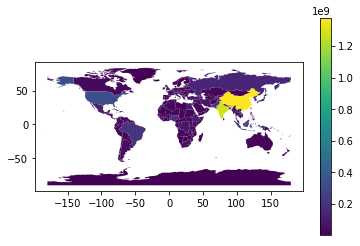

In [618]:
fig, ax = plt.subplots(1, 1)
world.plot(column= 'pop_est', ax=ax, legend=True)
plt.show()

In [620]:
world_cases_real_time.drop(['var'],axis=1,inplace=True)

In [625]:
world_cases_real_time.set_index('space',inplace=True)

In [626]:
world_cases_real_time

,time,total_cases
space,,
Afghanistan,2020-05-16,6402.0
Albania,2020-05-16,916.0
Algeria,2020-05-16,6629.0
Andorra,2020-05-16,761.0
Angola,2020-05-16,48.0
...,...,...
Venezuela,2020-05-16,459.0
Vietnam,2020-05-16,313.0
Yemen,2020-05-16,106.0


In [627]:
world.set_index('name',inplace=True)

In [628]:
world

,pop_est,continent,iso_a3,gdp_md_est,geometry
name,,,,,
Afghanistan,34124811,Asia,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
Albania,3047987,Europe,ALB,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
Algeria,40969443,Africa,DZA,609400.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948..."
Angola,29310273,Africa,AGO,189000.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
Antarctica,4050,Antarctica,ATA,810.0,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140..."
...,...,...,...,...,...
W. Sahara,603253,Africa,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
Yemen,28036829,Asia,YEM,73450.0,"POLYGON ((52.00001 19.00000, 52.78218 17.34974..."
Zambia,15972000,Africa,ZMB,65170.0,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458..."


In [630]:
list(world.index)

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antarctica',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herz.',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Rep.',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 'Dem. Rep. Congo',
 'Denmark',
 'Djibouti',
 'Dominican Rep.',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eq. Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Falkland Is.',
 'Fiji',
 'Finland',
 'Fr. S. Antarctic Lands',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Greenland',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy

In [631]:
list(world_cases_real_time.index)

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Faeroe Islands',
 'Falkland Islands',
 'Fiji',
 'Finland',
 'France',
 

In [633]:
list(set(world_cases_real_time.index) - set(world.index))

{'Andorra',
 'Anguilla',
 'Antigua and Barbuda',
 'Aruba',
 'Bahrain',
 'Barbados',
 'Bermuda',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'British Virgin Islands',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Comoros',
 "Cote d'Ivoire",
 'Curacao',
 'Czech Republic',
 'Democratic Republic of Congo',
 'Dominica',
 'Dominican Republic',
 'Equatorial Guinea',
 'Faeroe Islands',
 'Falkland Islands',
 'French Polynesia',
 'Gibraltar',
 'Grenada',
 'Guam',
 'Guernsey',
 'Isle of Man',
 'Jersey',
 'Liechtenstein',
 'Maldives',
 'Malta',
 'Mauritius',
 'Monaco',
 'Montserrat',
 'Northern Mariana Islands',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'San Marino',
 'Sao Tome and Principe',
 'Seychelles',
 'Singapore',
 'Sint Maarten (Dutch part)',
 'South Sudan',
 'Swaziland',
 'Timor',
 'Turks and Caicos Islands',
 'United States',
 'United States Virgin Islands',
 'Vatican'}

In [639]:
list(set(world.index) - set(world_cases_real_time.index))

['Somaliland',
 'Fr. S. Antarctic Lands',
 'North Korea',
 'Timor-Leste',
 'Falkland Is.',
 'N. Cyprus',
 'Central African Rep.',
 'Solomon Is.',
 "Côte d'Ivoire",
 'Eq. Guinea',
 'Vanuatu',
 'South Africa',
 'Dominican Rep.',
 'Dem. Rep. Congo',
 'S. Sudan',
 'United States of America',
 'eSwatini',
 'Czechia',
 'Turkmenistan',
 'W. Sahara',
 'Antarctica',
 'Bosnia and Herz.']

In [654]:
world_cases_real_time.reset_index(inplace=True)

In [655]:
world_cases_real_time

,space,time,total_cases
0,Afghanistan,2020-05-16,6402.0
1,Albania,2020-05-16,916.0
2,Algeria,2020-05-16,6629.0
3,Andorra,2020-05-16,761.0
4,Angola,2020-05-16,48.0
...,...,...,...
202,Venezuela,2020-05-16,459.0
203,Vietnam,2020-05-16,313.0
204,Yemen,2020-05-16,106.0
205,Zambia,2020-05-16,668.0


In [659]:
world_cases_real_time.replace(to_replace=['United States'], value='United States of America',inplace=True)

In [661]:
world_cases_real_time.replace(to_replace=['Timor'], value='Timor-Leste',inplace=True)

In [662]:
world_cases_real_time.replace(to_replace=['Falkland Islands'], value='Falkland Is.',inplace=True)

In [663]:
world_cases_real_time.replace(to_replace=['Central African Republic'], value='Central African Rep.',inplace=True)

In [664]:
world_cases_real_time.replace(to_replace=["Cote d'Ivoire"], value="Côte d'Ivoire",inplace=True)

In [665]:
world_cases_real_time.replace(to_replace=["Equatorial Guine"], value="Eq. Guinea",inplace=True)

In [666]:
world_cases_real_time.replace(to_replace=["Dominican Republic"], value="Dominican Rep.",inplace=True)

In [667]:
world_cases_real_time.replace(to_replace=["Democratic Republic of Congo"], value="Dem. Rep. Congo",inplace=True)

In [668]:
world_cases_real_time.replace(to_replace=["South Sudan"], value="S. Sudan",inplace=True)

In [669]:
world_cases_real_time.replace(to_replace=["Swaziland"], value="eSwatini",inplace=True)

In [670]:
world_cases_real_time.replace(to_replace=["Czech Republic"], value="Czechia",inplace=True)

In [671]:
world_cases_real_time.replace(to_replace=["Bosnia and Herzegovina"], value="Bosnia and Herz.",inplace=True)

In [675]:
world_cases_real_time.set_index('space',inplace=True)

In [676]:
world_cases_real_time

,time,total_cases
space,,
Afghanistan,2020-05-16,6402.0
Albania,2020-05-16,916.0
Algeria,2020-05-16,6629.0
Andorra,2020-05-16,761.0
Angola,2020-05-16,48.0
...,...,...
Venezuela,2020-05-16,459.0
Vietnam,2020-05-16,313.0
Yemen,2020-05-16,106.0


In [677]:
list(set(world_cases_real_time.index) - set(world.index))

['Seychelles',
 'Guernsey',
 'Liechtenstein',
 'Comoros',
 'Gibraltar',
 'Guam',
 'Mauritius',
 'Saint Vincent and the Grenadines',
 'Bahrain',
 'Barbados',
 'Isle of Man',
 'Aruba',
 'Anguilla',
 'Vatican',
 'Malta',
 'Montserrat',
 'Monaco',
 'Dominica',
 'Antigua and Barbuda',
 'Saint Kitts and Nevis',
 'Sint Maarten (Dutch part)',
 'Northern Mariana Islands',
 'Cayman Islands',
 'Andorra',
 'Singapore',
 'Faeroe Islands',
 'United States Virgin Islands',
 'San Marino',
 'British Virgin Islands',
 'Curacao',
 'Jersey',
 'Saint Lucia',
 'Turks and Caicos Islands',
 'Grenada',
 'French Polynesia',
 'Bermuda',
 'Equatorial Guinea',
 'Sao Tome and Principe',
 'Bonaire Sint Eustatius and Saba',
 'Maldives',
 'Cape Verde']

In [678]:
list(set(world.index) - set(world_cases_real_time.index))

['Eq. Guinea',
 'Turkmenistan',
 'Somaliland',
 'Solomon Is.',
 'Fr. S. Antarctic Lands',
 'North Korea',
 'Antarctica',
 'W. Sahara',
 'N. Cyprus',
 'Vanuatu',
 'South Africa']

In [681]:
world_ext = pd.concat([world,world_cases_real_time],axis=1)

In [695]:
list(range(0,6))

[0, 1, 2, 3, 4, 5]

In [698]:
world_ext

,pop_est,continent,iso_a3,gdp_md_est,geometry,time,total_cases
Afghanistan,34124811.0,Asia,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2020-05-16,6402.0
Albania,3047987.0,Europe,ALB,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",2020-05-16,916.0
Algeria,40969443.0,Africa,DZA,609400.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",2020-05-16,6629.0
Angola,29310273.0,Africa,AGO,189000.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",2020-05-16,48.0
Antarctica,4050.0,Antarctica,ATA,810.0,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...",NaT,NaN
...,...,...,...,...,...,...,...
Singapore,NaN,NaN,NaN,NaN,None,2020-05-16,26891.0
Sint Maarten (Dutch part),NaN,NaN,NaN,NaN,None,2020-05-16,77.0
Turks and Caicos Islands,NaN,NaN,NaN,NaN,None,2020-05-16,12.0
United States Virgin Islands,NaN,NaN,NaN,NaN,None,2020-05-16,69.0


In [701]:
list(range(0,len(world_ext['time'])))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [719]:
world_ext['log_cases'] = world_ext['total_cases'].apply(lambda x:math.log(x,2))

In [720]:
world_ext.loc[['United States of America'],:]

,pop_est,continent,iso_a3,gdp_md_est,geometry,time,total_cases,log_cases
United States of America,326625791.0,North America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",2020-05-16,1443397.0,20.461037


In [722]:
world_ext.loc[['Spain'],:]

,pop_est,continent,iso_a3,gdp_md_est,geometry,time,total_cases,log_cases
Spain,48958159.0,Europe,ESP,1690000.0,"POLYGON ((-7.45373 37.09779, -7.53711 37.42890...",2020-05-16,NaN,NaN


In [727]:
new_total_cases.loc['Spain',:]

datetime                                             
2019-12-31  Total confirmed cases of COVID-19 (cases)         0.0
2020-01-01  Total confirmed cases of COVID-19 (cases)         0.0
2020-01-02  Total confirmed cases of COVID-19 (cases)         0.0
2020-01-03  Total confirmed cases of COVID-19 (cases)         0.0
2020-01-04  Total confirmed cases of COVID-19 (cases)         0.0
                                                           ...   
2020-05-12  Total confirmed cases of COVID-19 (cases)    228252.0
2020-05-13  Total confirmed cases of COVID-19 (cases)    228691.0
2020-05-14  Total confirmed cases of COVID-19 (cases)    229540.0
2020-05-15  Total confirmed cases of COVID-19 (cases)    230183.0
2020-05-16  Total confirmed cases of COVID-19 (cases)         NaN
Name: Spain, Length: 138, dtype: float64

In [724]:
total_cases[total_cases['Entity'] == 'Spain']

,Entity,Total confirmed cases of COVID-19 (cases),datetime
16248,Spain,0,2019-12-31
16249,Spain,0,2020-01-01
16250,Spain,0,2020-01-02
16251,Spain,0,2020-01-03
16252,Spain,0,2020-01-04
...,...,...,...
16380,Spain,227770,2020-05-11
16381,Spain,228252,2020-05-12
16382,Spain,228691,2020-05-13
16383,Spain,229540,2020-05-14


In [718]:
math.log(2,2)

1.0

In [712]:
list(world_ext.index)

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antarctica',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herz.',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Rep.',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 'Dem. Rep. Congo',
 'Denmark',
 'Djibouti',
 'Dominican Rep.',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eq. Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Falkland Is.',
 'Fiji',
 'Finland',
 'Fr. S. Antarctic Lands',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Greenland',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy

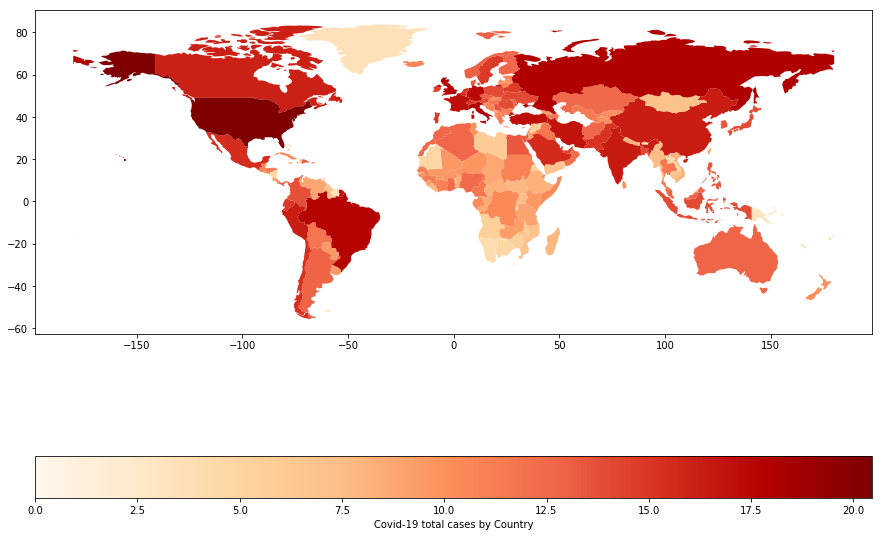

In [745]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
world_ext.plot(column= 'log_cases', ax=ax, legend=True, legend_kwds={'label': "Covid-19 total cases by Country",
                         'orientation': "horizontal"}, cmap='OrRd')
plt.show()

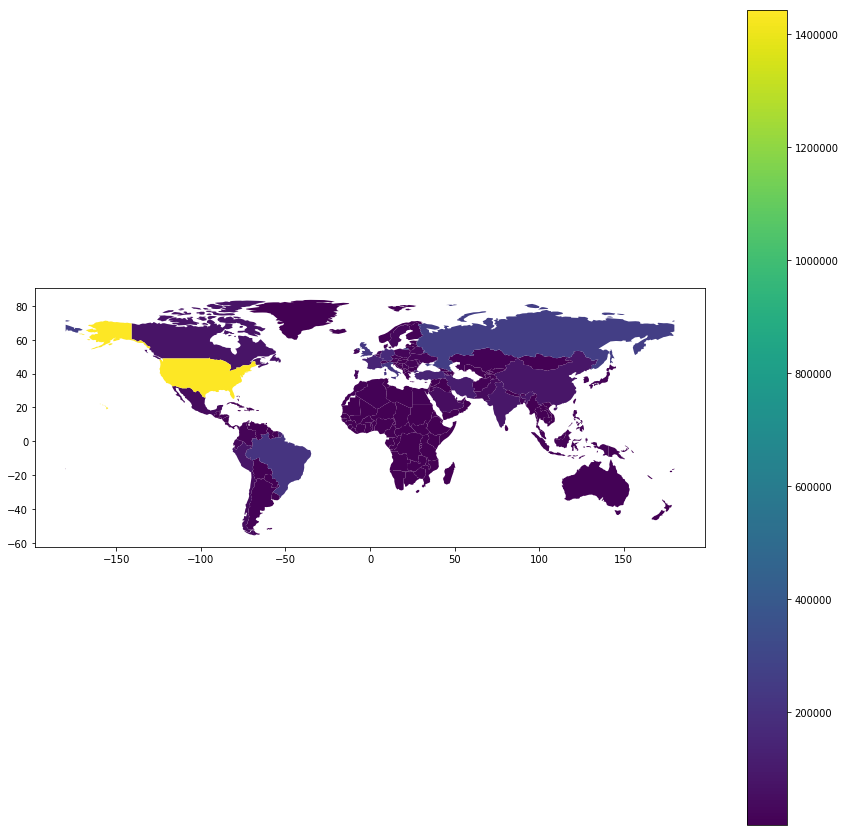

In [743]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
world_ext.plot(column= 'total_cases', ax=ax, legend=True)
plt.show()